In [6]:
import os
import collections
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib.colors import ListedColormap
from palettable.cartocolors.sequential import BluGrn_6
from palettable.colorbrewer.sequential import YlGnBu_8
from palettable.colorbrewer.sequential import YlGn_8
from palettable.cartocolors.sequential import PurpOr_6
from palettable.cmocean.sequential import Tempo_10
from palettable.cmocean.sequential import Matter_8
from palettable.cmocean.sequential import Dense_8
from palettable.cmocean.sequential import Deep_10
from palettable.wesanderson import Mendl_4

from ideotype.analysis import (identify_top_phenos,
                               identify_improved_phenos,
                               prevalent_top_pheno,
                               rank_all_phenos,
                               rank_top_phenos,
                               calc_target_pheno_perct)
from ideotype.data_process import (read_data,
                                   parse_mature,
                                   agg_sims,
                                   process_sims,
                                   fetch_sim_values)
from ideotype.figures import plot_sims_heatmap, plot_pheno_summary, plot_site_summary
from ideotype import DATA_PATH

### Data prep

In [7]:
run_name = 'present'

# Read in data etc.
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    f'/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_{run_name}.yml')
df_extended, df_stuck = parse_mature(df_all)
df_all.drop(df_stuck.index, inplace=True)

# Rank phenotypes
df_rankings, phenos_ranked = rank_all_phenos(run_name=run_name, n_pheno=100,
                                             w_yield=1, w_disp=1)

# Queried maizsim outputs
df_sims = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_yield.csv'))
df_phys = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_phys.csv'))
df_carbon = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_carbon.csv'))
df_mass = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_mass.csv'))
df_leaves = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_leaves.csv'))
df_waterdeficit = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterdeficit.csv'))
df_waterdeficit_sum = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterdeficit_sum.csv'))
df_waterpotential = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterpotential.csv'))
df_phenology = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_pheno.csv'))
start_dates = [int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates
df_gseason_climate = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_gseason_climate.csv'))

## 0. Climate

#### Climate info per site & phenotype

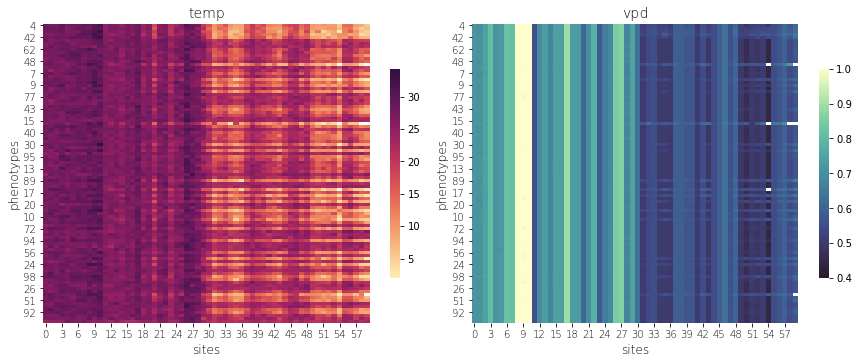

In [9]:
groups = ['cvar', 'site']
mx_temp = agg_sims(df_matured, groups, 'mean', 'temp_air')
df_temp = pd.DataFrame(mx_temp)
mx_vpd = agg_sims(df_matured, groups, 'mean', 'vpd')
df_vpd = pd.DataFrame(mx_vpd)

fig = plt.figure(figsize=(15,5.5))
ax1 = fig.add_subplot(1,2,1)
hm = sns.heatmap(df_temp.reindex(phenos_ranked),
                 cmap=Matter_8.mpl_colormap,
                 cbar_kws={'shrink': 0.7})
ax1.set_title('temp', fontweight='light', size=14)
ax1.set_xlabel('sites', fontweight='light', size=12)
ax1.set_ylabel('phenotypes', fontweight='light', size=12)
plt.xticks(fontweight='light', fontsize=10)
plt.yticks(fontweight='light', fontsize=10, rotation=0)

ax2 = fig.add_subplot(1,2,2)
hm = sns.heatmap(df_vpd.reindex(phenos_ranked),
                 vmin=0.4, vmax=1,
                 cmap=Deep_10.mpl_colormap.reversed(),
                 cbar_kws={'shrink': 0.7})
ax2.set_title('vpd', fontweight='light', size=14)
ax2.set_xlabel('sites', fontweight='light', size=12)
ax2.set_ylabel('phenotypes', fontweight='light', size=12)
plt.xticks(fontweight='light', fontsize=10)
plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.05)
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/heatmap_gseason_climate.png', format='png', dpi=800)

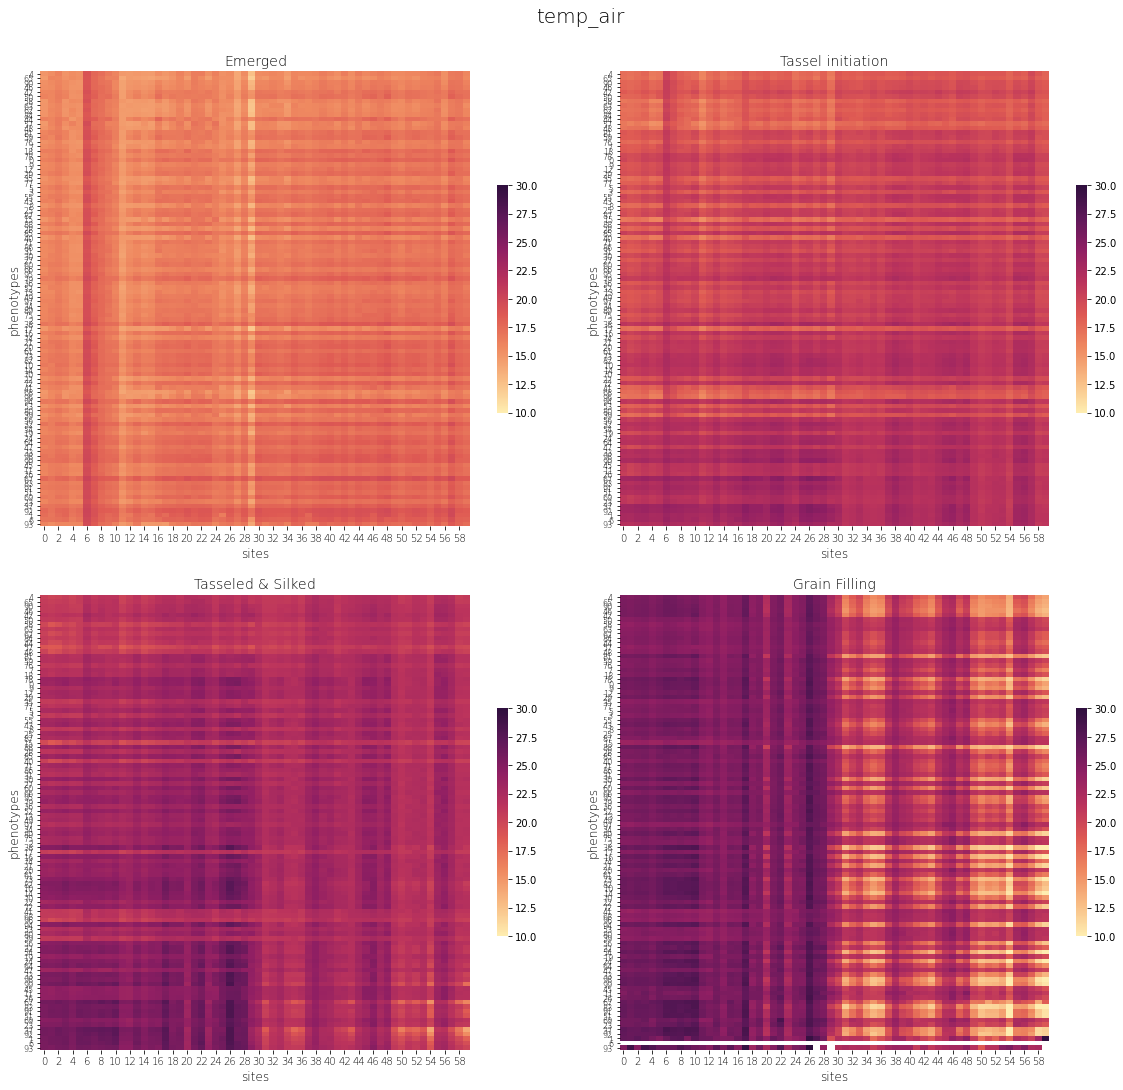

In [11]:
plot_sims_heatmap(df_gseason_climate, 'temp_air', 'mean', 
                  phenos_ranked, Matter_8.mpl_colormap, 
                  vmins = [10,10,10,10], vmaxs = [30,30,30,30], save=False)

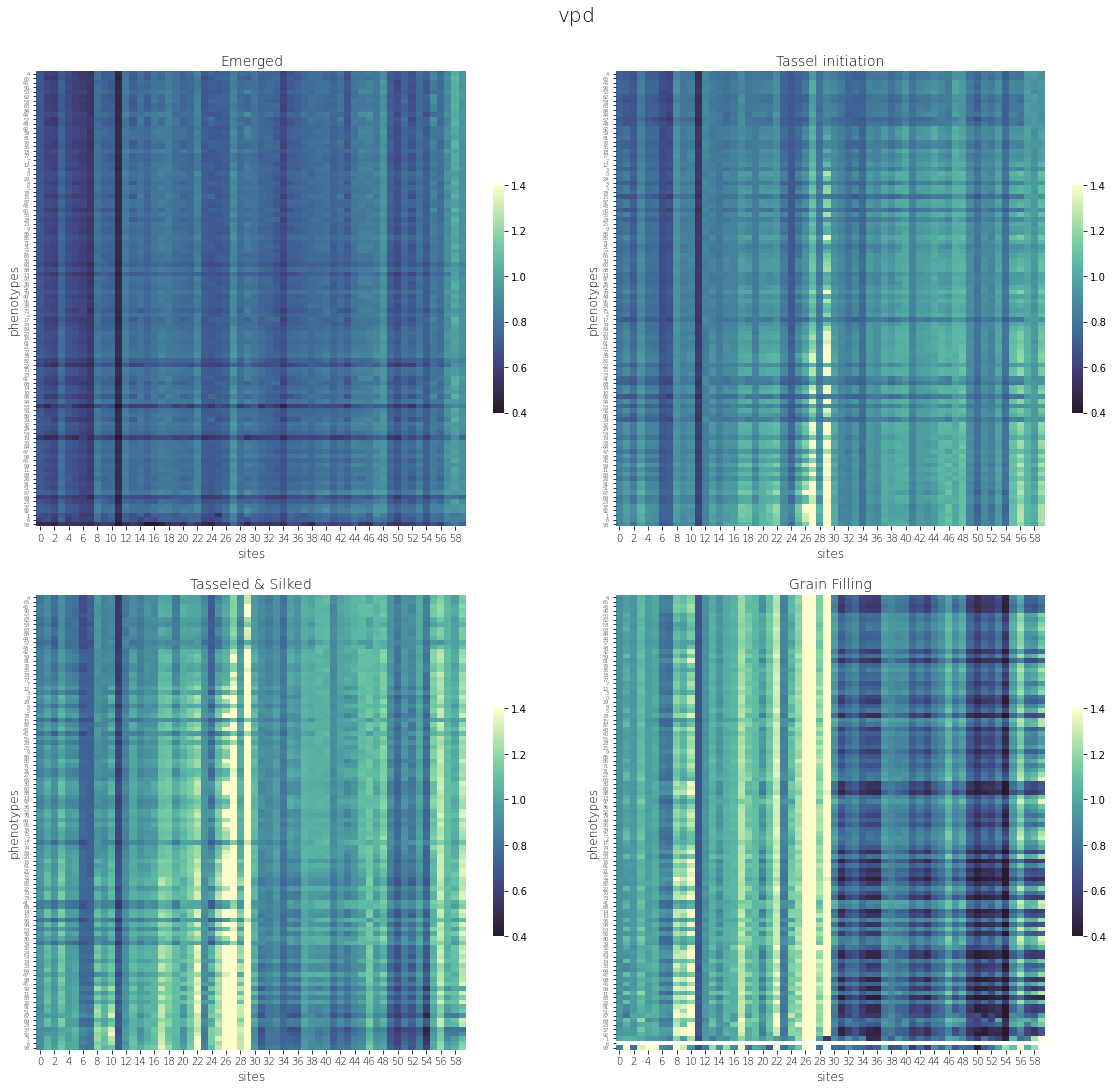

In [6]:
plot_sims_heatmap(df_gseason_climate, 'vpd', 'mean',
                  phenos_ranked, Deep_10.mpl_colormap.reversed(), 
                  vmins = [0.4,0.4,0.4,0.4], vmaxs = [1.4,1.4,1.4,1.4], save=False)

## 1. Biomass

#### Total biomass

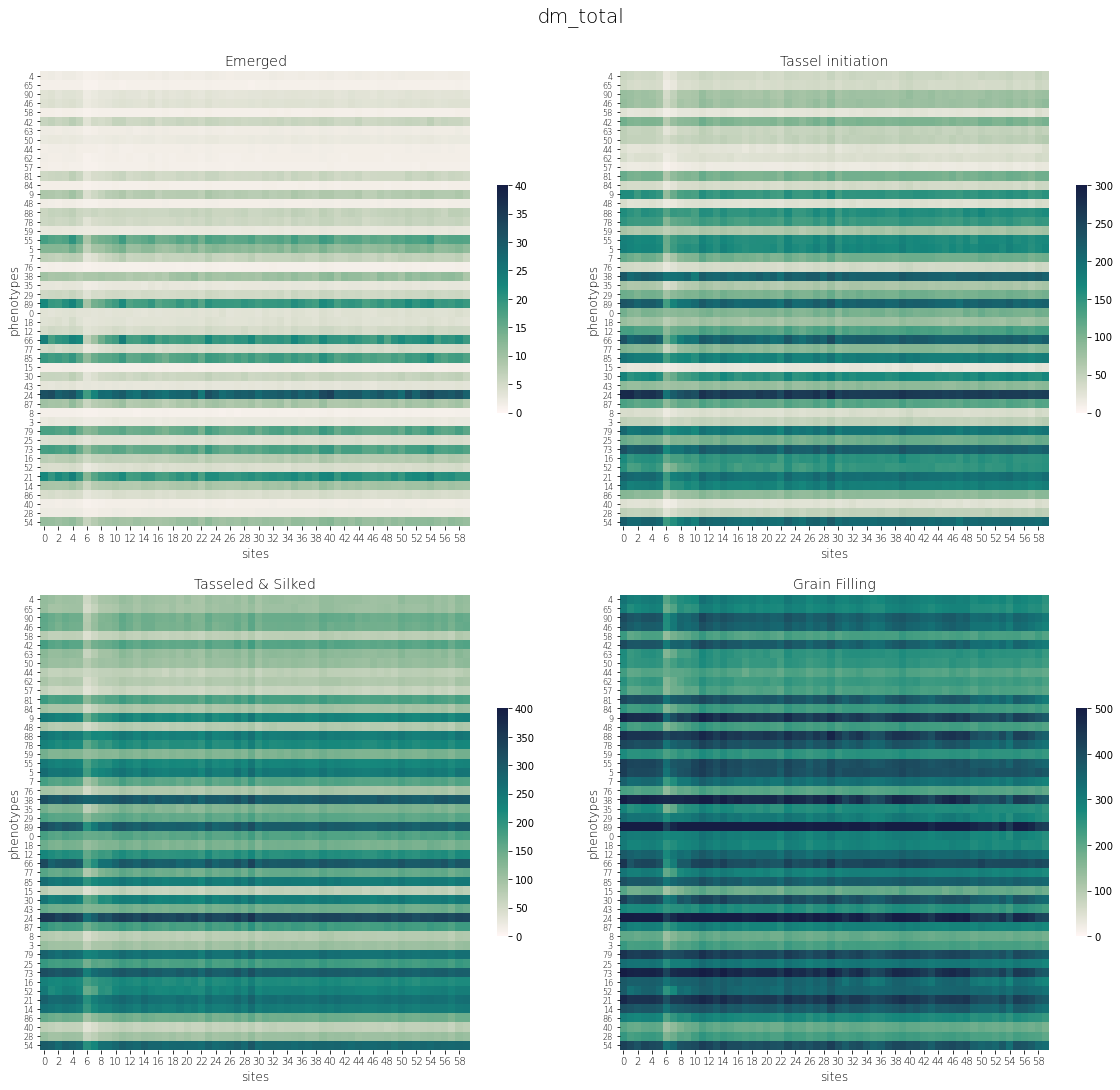

In [5]:
top_phenos = rank_top_phenos('present', 20, 1, 1)
plot_sims_heatmap(df_mass, 'dm_total', 'mean', top_phenos,
                  Tempo_10.mpl_colormap, vmins = [0,0,0,0], vmaxs = [40,300,400,500],
                  save=True)

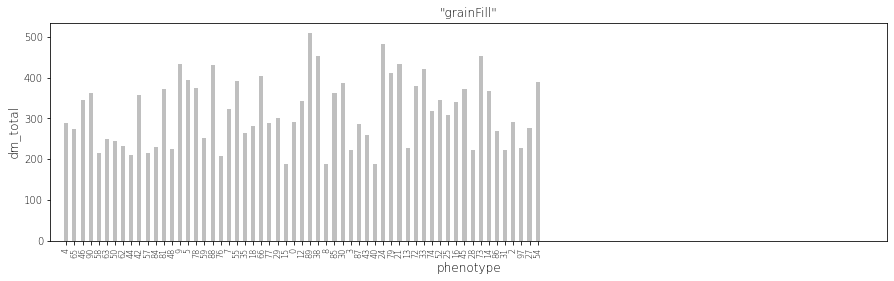

In [239]:
plot_pheno_summary(df_mass, '"grainFill"', 'dm_total', phenos_ranked, color='grey', alpha=0.5)

#### Ear biomass

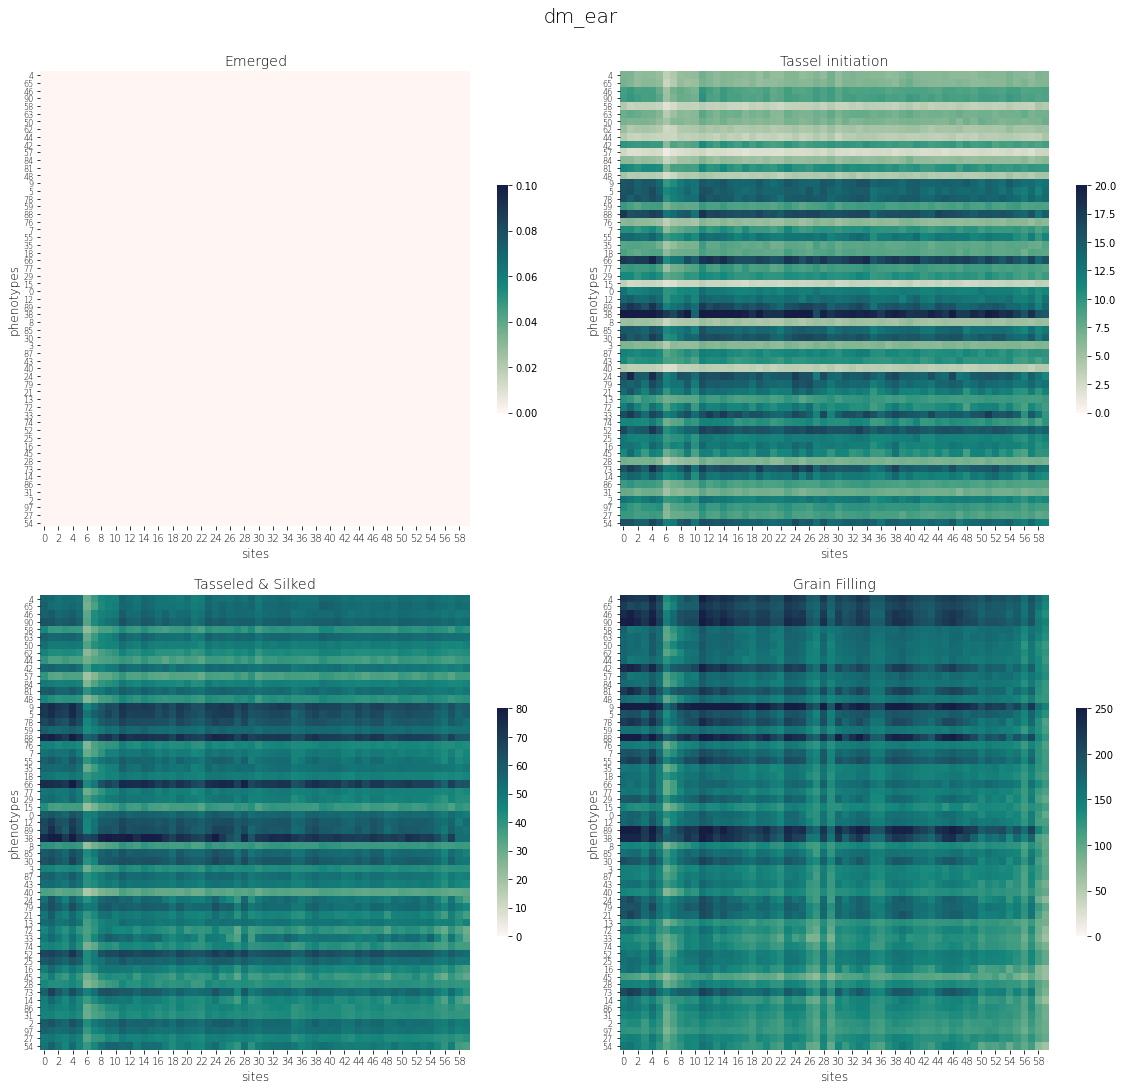

In [3]:
phenos_ranked = rank_top_phenos('present', 20, 1, 1)
plot_sims_heatmap(df_mass, 'dm_ear', 'mean', phenos_ranked,
                  Tempo_10.mpl_colormap, vmins = [0,0,0,0], vmaxs = [0.1,20,80,250],
                  yfont_size=8, save=True)

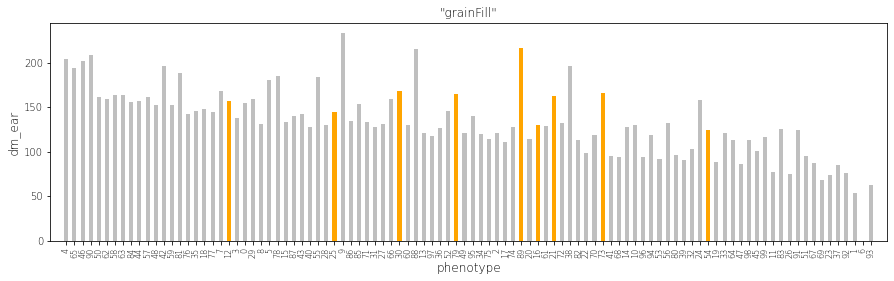

In [12]:
phenos_ranked = rank_top_phenos('present', 100, 1, 1)
plot_pheno_summary(df_mass, '"grainFill"', 'dm_ear', phenos_ranked, color='grey', alpha=0.5, 
                   target_phenos=[73,25,89,21,30,16,54,79,12], target_color='orange')

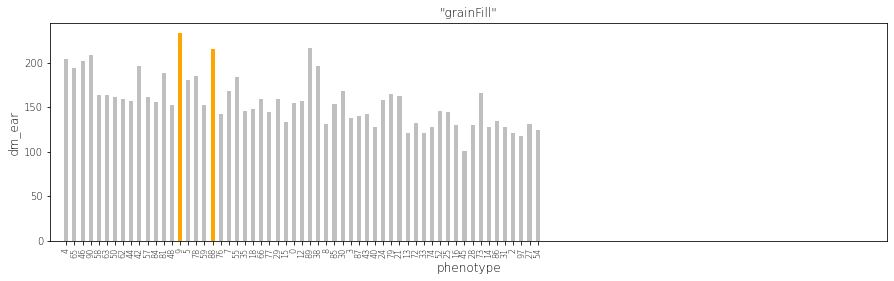

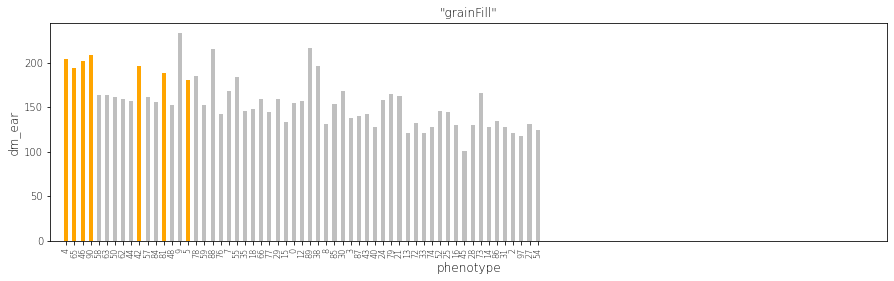

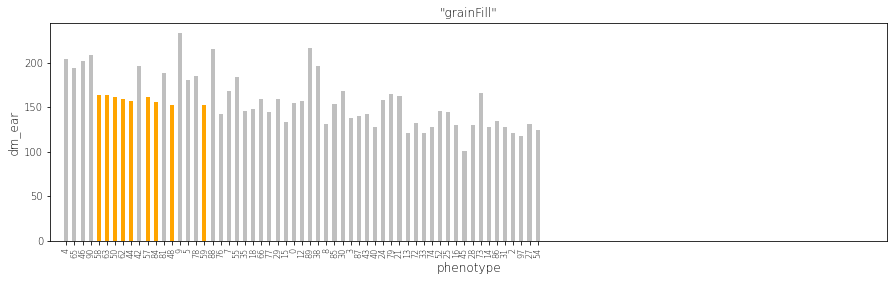

In [247]:
# High yield high volatility
plot_pheno_summary(df_mass, '"grainFill"', 'dm_ear', phenos_ranked, color='grey', alpha=0.5, 
                   target_phenos=[88,9], target_color='orange')
# Middle ground
plot_pheno_summary(df_mass, '"grainFill"', 'dm_ear', phenos_ranked, color='grey', alpha=0.5, 
                   target_phenos=[5,81,42,46,90,65,4], target_color='orange')
# Low yield low volatility
plot_pheno_summary(df_mass, '"grainFill"', 'dm_ear', phenos_ranked, color='grey', alpha=0.5, 
                   target_phenos=[59,48,84,44,62,57,50,63,58], target_color='orange')

## 2. Physiology

#### Canopy-level net photosynthesis (µmol CO2 per m2 per sec)
- Averaged over daylight hours within each phenostage
- Southern sites actually show higher rates, which probably means that temperatures are not reaching optimal ranges yet
- Site differences don't show until later in the season (grain fill), which is probably because temperature differences between sites were not as pronounced until later in the growing season

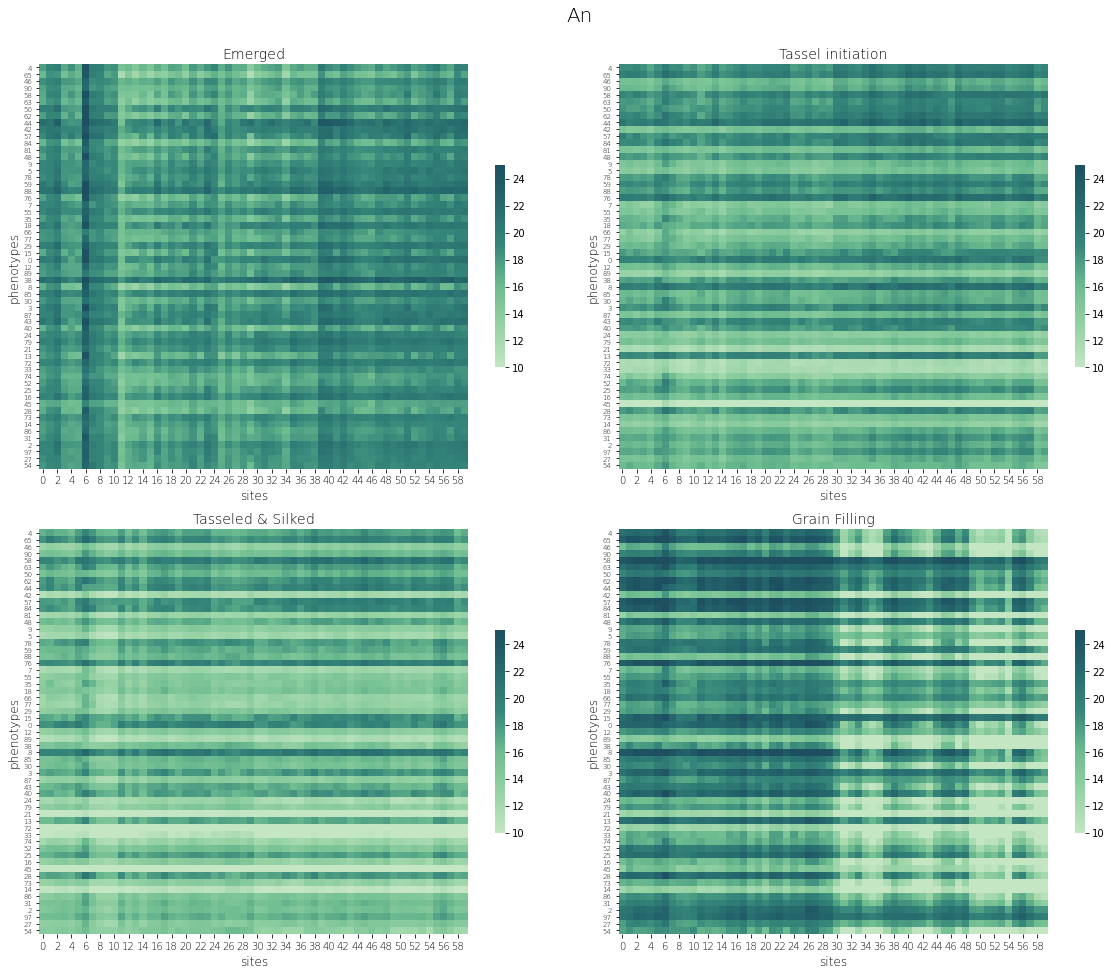

In [7]:
phenos_ranked = rank_top_phenos('present', 20, 1, 1)
plot_sims_heatmap(df_phys, 'An', 'mean', phenos_ranked, 
                  cmap=BluGrn_6.mpl_colormap, 
                  vmins = [10,10,10,10], vmaxs = [25,25,25,25],
                  yfont_size=7, fig_w=20, fig_h=16, save=True)

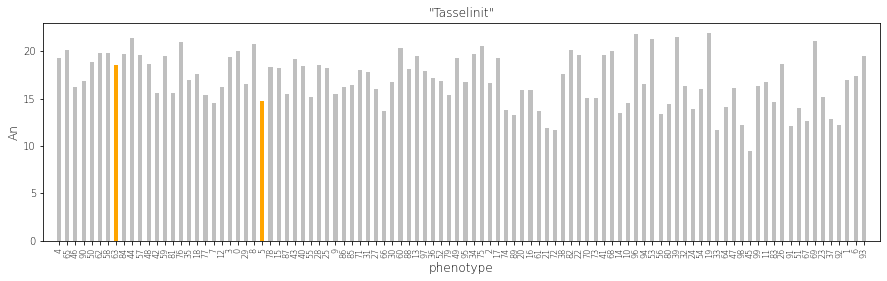

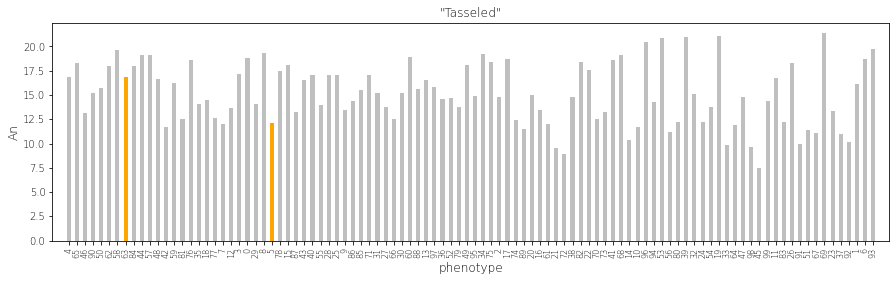

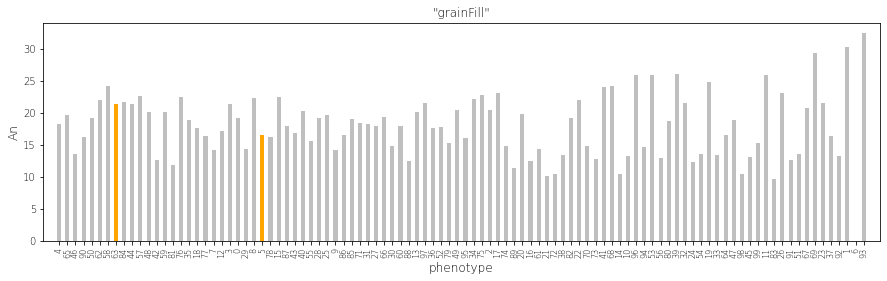

In [20]:
phenos_ranktop = rank_top_phenos('present', 100, 1, 1)
plot_pheno_summary(df_phys, '"Tasselinit"', 'An', phenos_ranktop, color='grey', alpha=0.5,
                   target_phenos=[5,63], target_color='orange')
plot_pheno_summary(df_phys, '"Tasseled"', 'An', phenos_ranktop, color='grey', alpha=0.5,
                   target_phenos=[5,63], target_color='orange')
plot_pheno_summary(df_phys, '"grainFill"', 'An', phenos_ranktop, color='grey', alpha=0.5,
                   target_phenos=[5,63], target_color='orange')

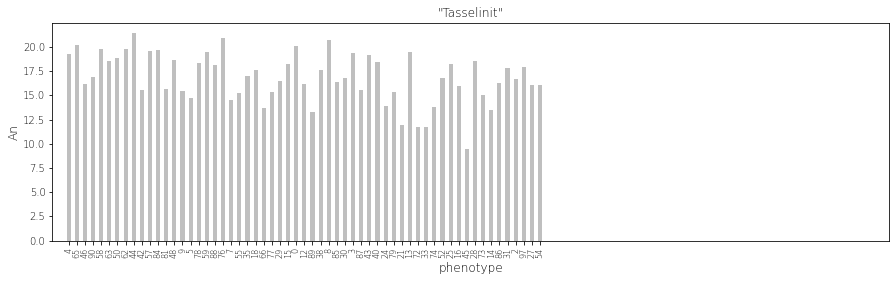

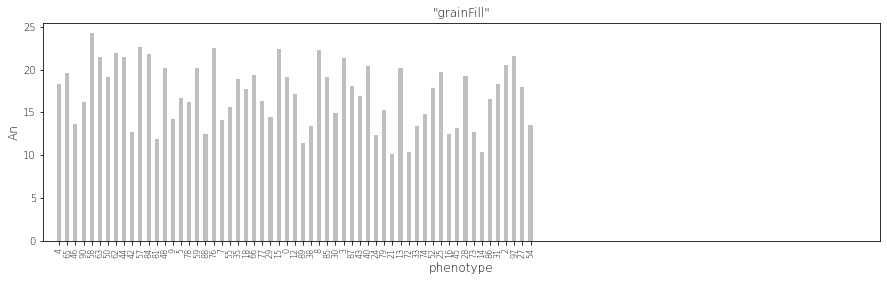

In [8]:
phenos_ranktop = rank_top_phenos('present', 20, 1, 1)
plot_pheno_summary(df_phys, '"Tasselinit"', 'An', phenos_ranktop, color='grey', alpha=0.5, save=True)
plot_pheno_summary(df_phys, '"grainFill"', 'An', phenos_ranktop, color='grey', alpha=0.5, save=True)

#### Sunlit An

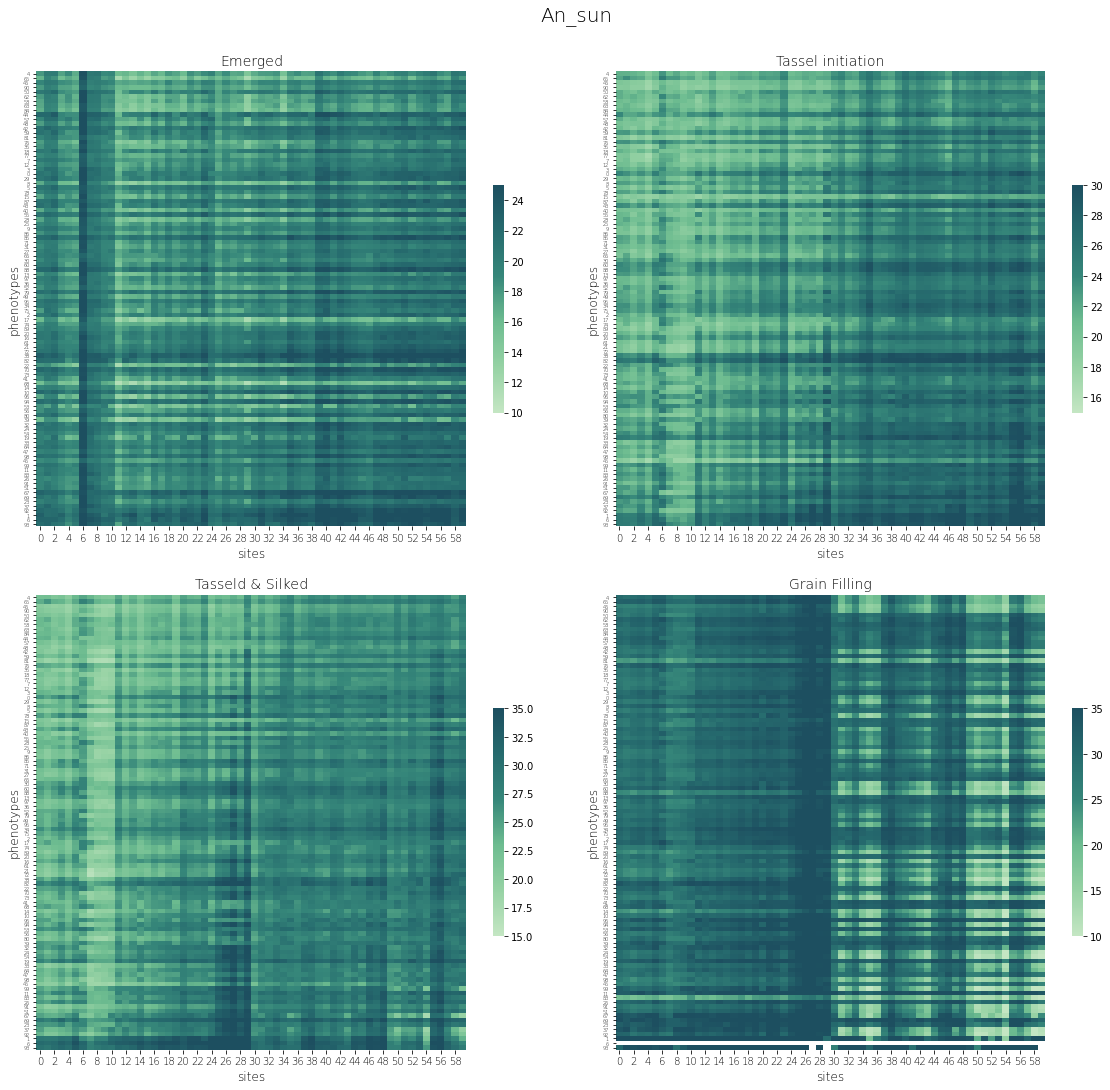

In [134]:
plot_sims_heatmap(df_phys, 'An_sun', 'mean', BluGrn_6.mpl_colormap, 
                  vmins = [10,15,15,10], vmaxs = [25,30,35,35])

#### Shaded An

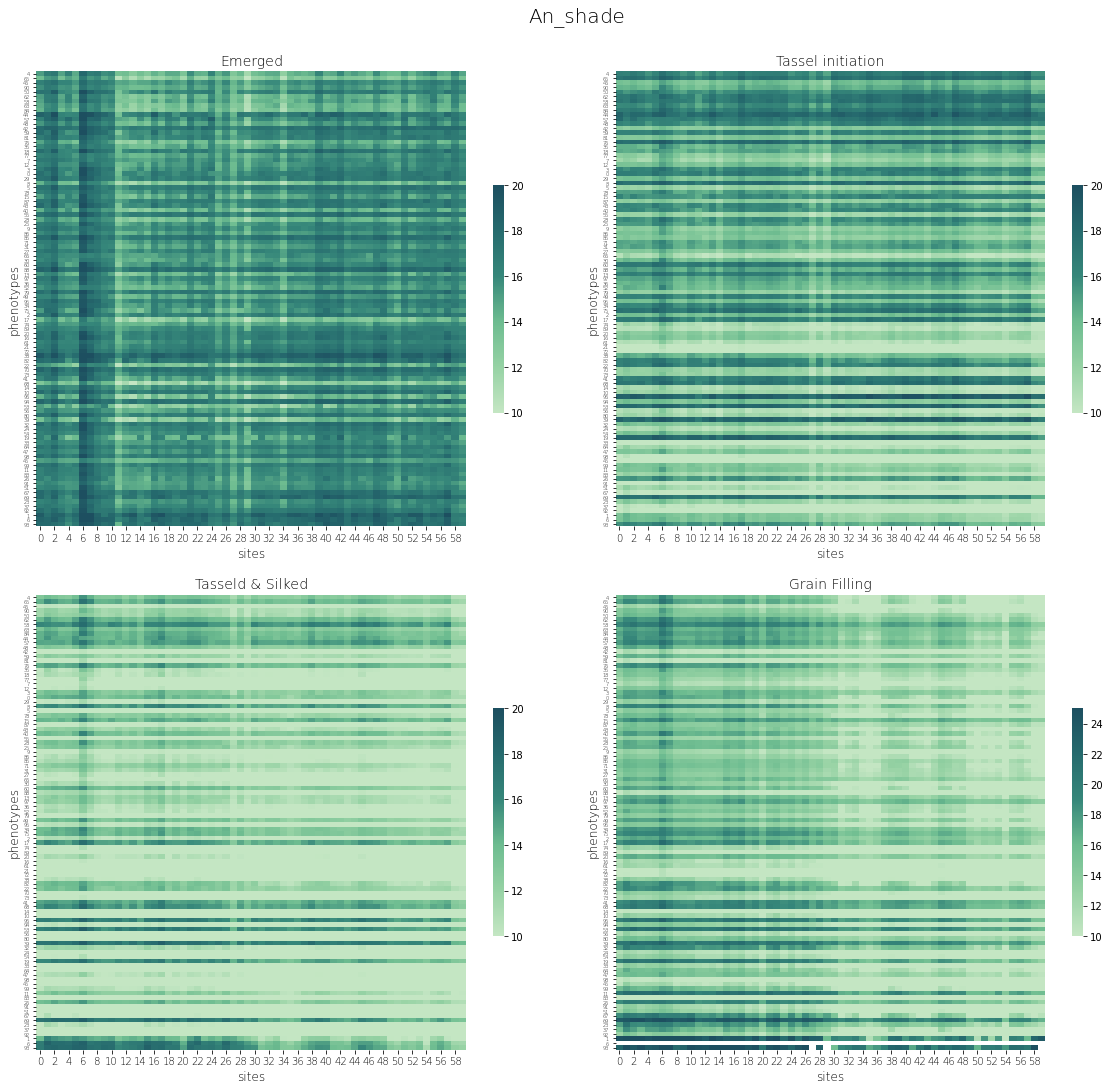

In [65]:
plot_sims_heatmap(df_phys, 'An_shade', 'mean', BluGrn_6.mpl_colormap, 
                  vmins = [10,10,10,10], vmaxs = [20,20,20,25])

#### Net photosynthesis (g per plant per hour)
Averaged over daylight hours within each phenostage

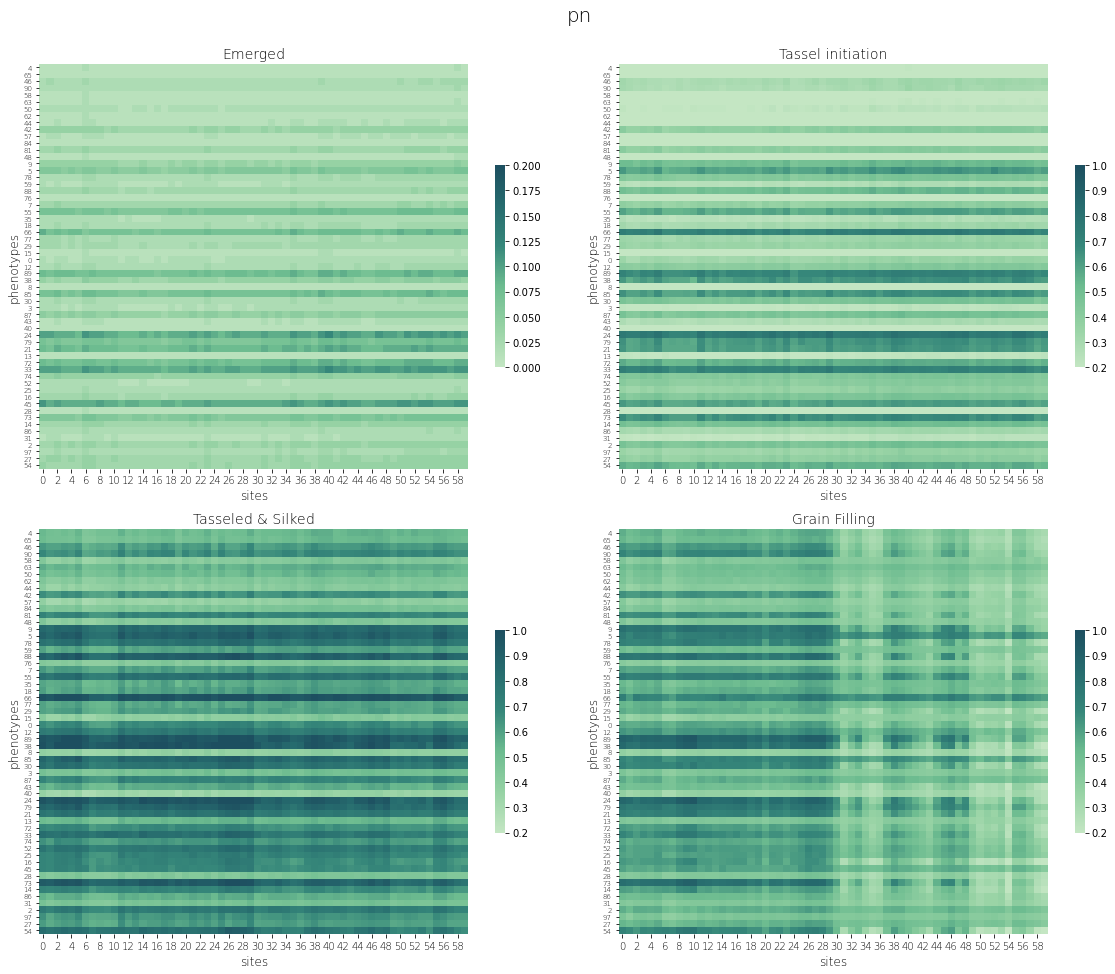

In [8]:
phenos_ranked = rank_top_phenos('present', 20, 1, 1)
plot_sims_heatmap(df_phys, 'pn', 'mean', phenos_ranked, 
                  cmap=BluGrn_6.mpl_colormap, 
                  vmins = [0,0.2,0.2,0.2], vmaxs = [0.2,1,1,1],
                  yfont_size=7, fig_w=20, fig_h=16, save=True)

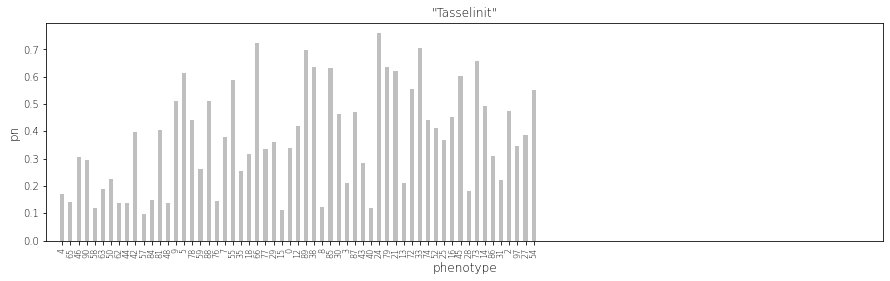

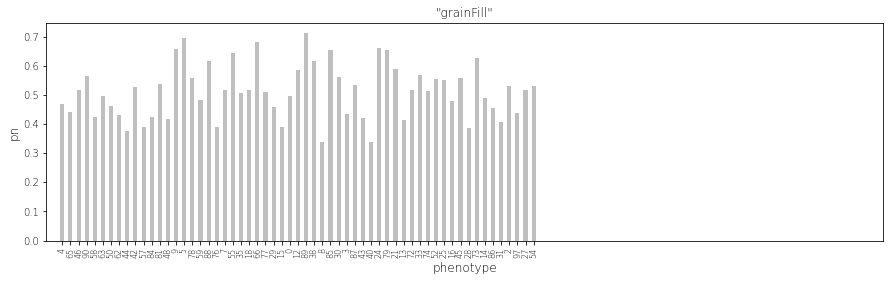

In [5]:
phenos_ranktop = rank_top_phenos('present', 20, 1, 1)
plot_pheno_summary(df_phys, '"Tasselinit"', 'pn', phenos_ranktop, color='grey', alpha=0.5, save=True)
plot_pheno_summary(df_phys, '"grainFill"', 'pn', phenos_ranktop, color='grey', alpha=0.5, save=True)

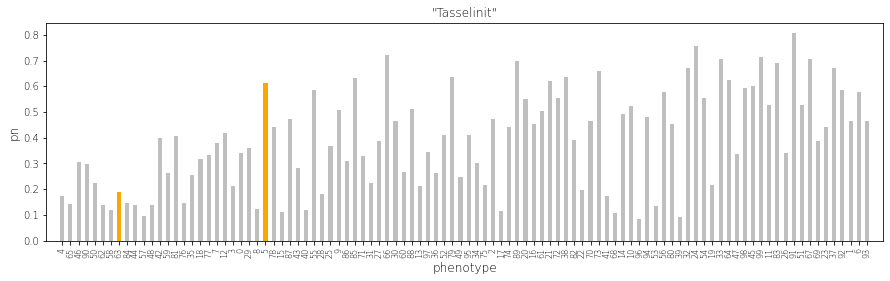

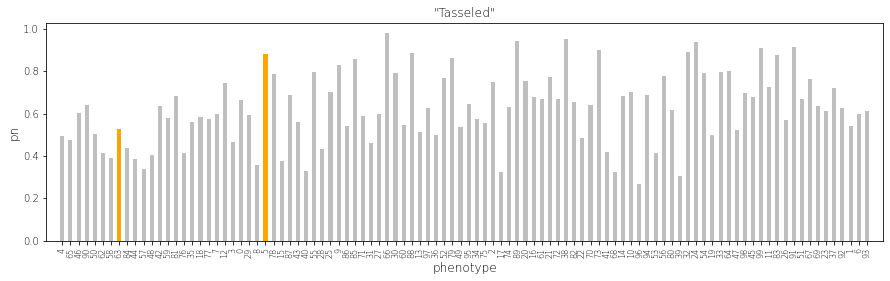

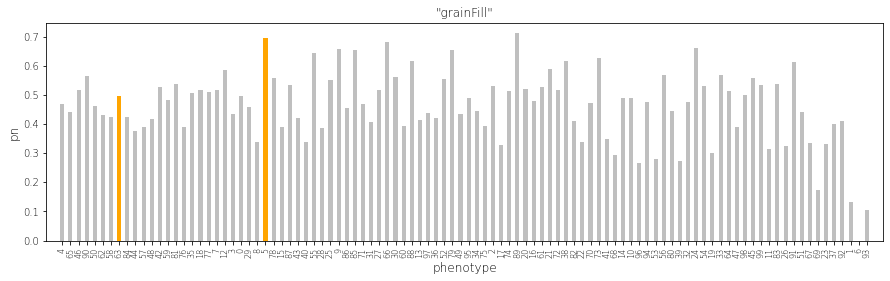

In [19]:
phenos_ranktop = rank_top_phenos('present', 100, 1, 1)
plot_pheno_summary(df_phys, '"Tasselinit"', 'pn', phenos_ranktop, color='grey', alpha=0.5, save=True,
                   target_phenos=[5,63], target_color='orange')
plot_pheno_summary(df_phys, '"Tasseled"', 'pn', phenos_ranktop, color='grey', alpha=0.5, save=True,
                   target_phenos=[5,63], target_color='orange')
plot_pheno_summary(df_phys, '"grainFill"', 'pn', phenos_ranktop, color='grey', alpha=0.5, save=True,
                   target_phenos=[5,63], target_color='orange')

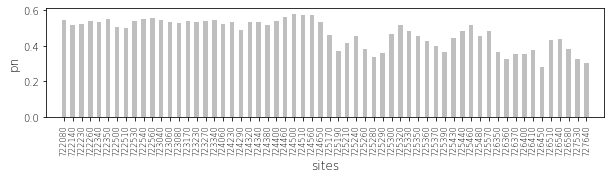

In [11]:
plot_site_summary(df_phys, '"grainFill"', 'pn', color='grey', alpha=0.5)

#### Net carbon gain (gC per plant per hour) - summed within phenostage
Notice how north/south site difference in net photosynthetic rate during the grain filling stage went away with summed net carbon gain. <br/>
I think this is mostly due to the difference in phenostage length between phenotypes.

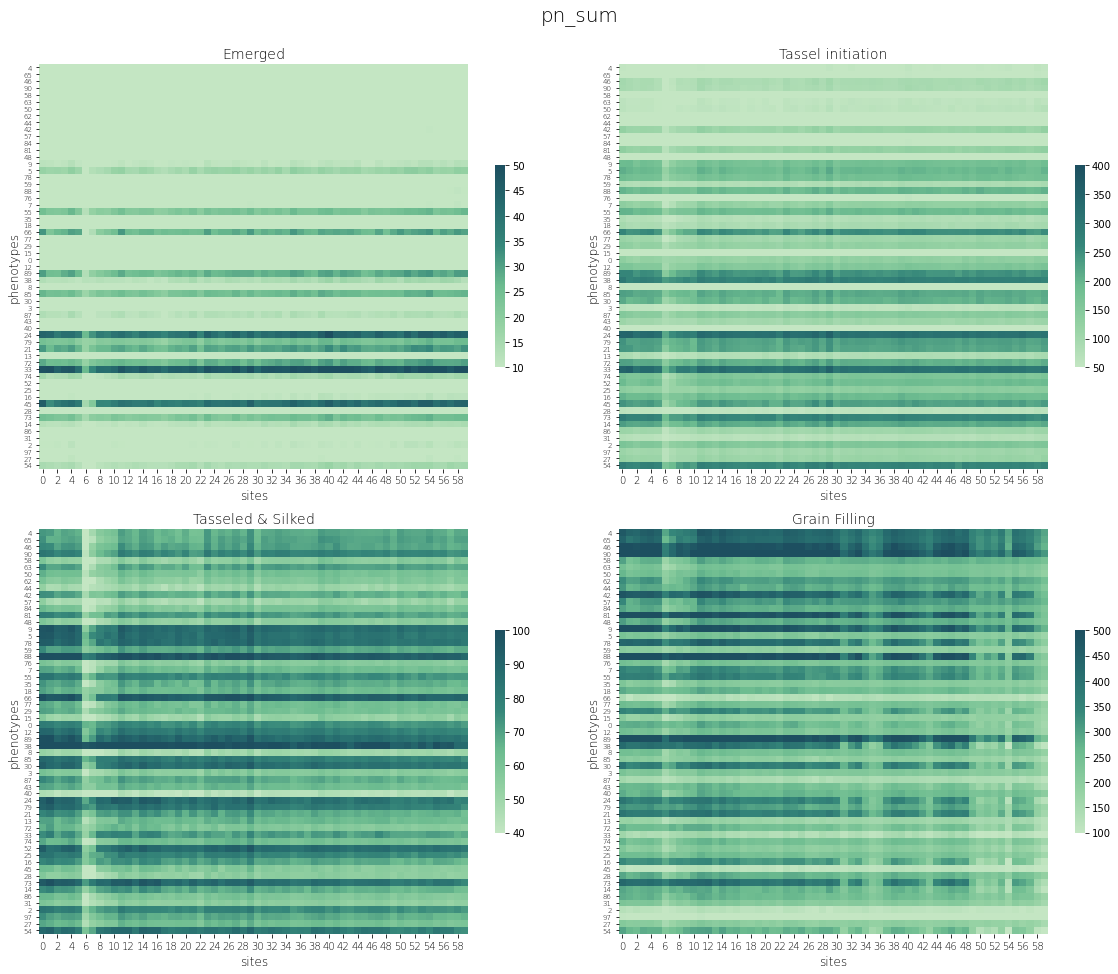

In [10]:
phenos_ranked = rank_top_phenos('present', 20, 1, 1)
plot_sims_heatmap(df_carbon, 'pn_sum', 'mean', phenos_ranked, 
                  cmap=BluGrn_6.mpl_colormap, 
                  vmins = [10,50,40,100], vmaxs = [50,400,100,500],
                  yfont_size=7, fig_w=20, fig_h=16, save=True)

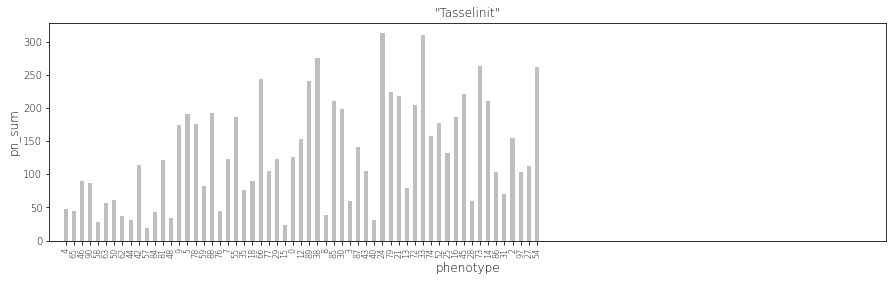

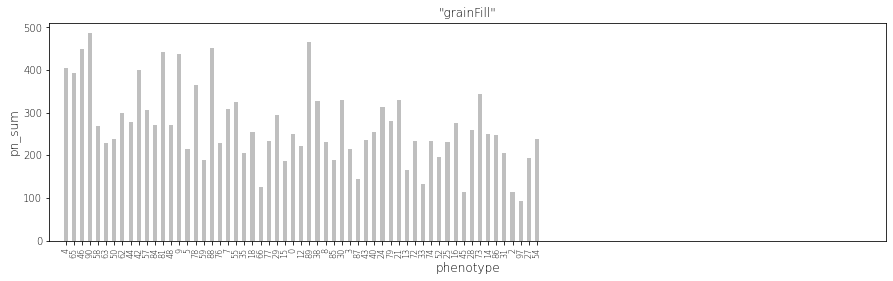

In [7]:
plot_pheno_summary(df_carbon, '"Tasselinit"', 'pn_sum', phenos_ranktop, color='grey', alpha=0.5, save=True)
plot_pheno_summary(df_carbon, '"grainFill"', 'pn_sum', phenos_ranktop, color='grey', alpha=0.5, save=True)

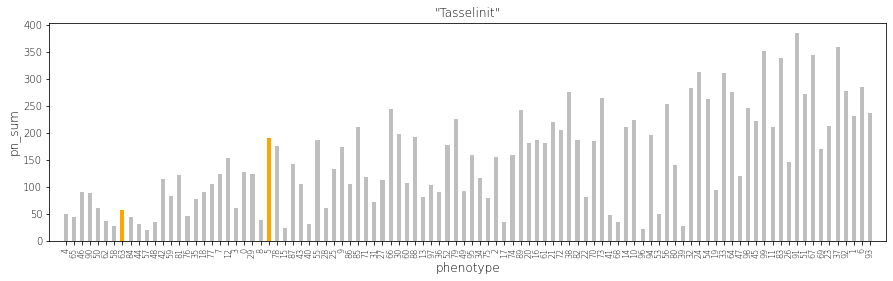

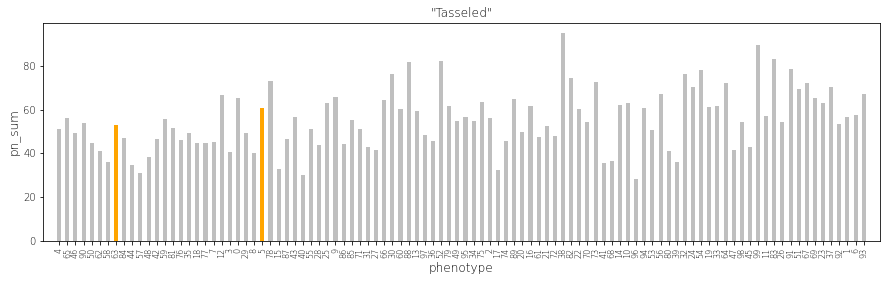

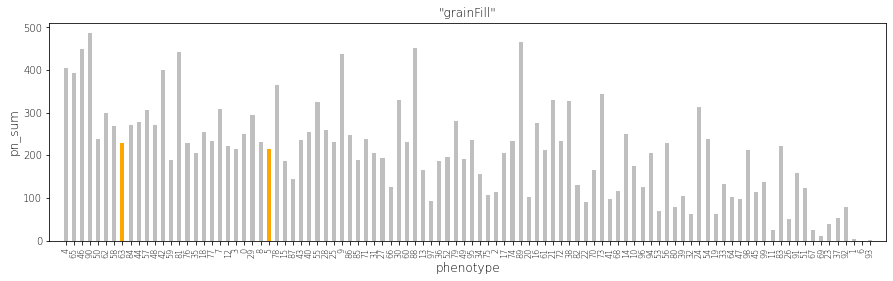

In [22]:
phenos_ranktop = rank_top_phenos('present', 100, 1, 1)
plot_pheno_summary(df_carbon, '"Tasselinit"', 'pn_sum', phenos_ranktop, color='grey', alpha=0.5, save=True,
                   target_phenos=[5,63], target_color='orange')
plot_pheno_summary(df_carbon, '"Tasseled"', 'pn_sum', phenos_ranktop, color='grey', alpha=0.5, save=True,
                   target_phenos=[5,63], target_color='orange')
plot_pheno_summary(df_carbon, '"grainFill"', 'pn_sum', phenos_ranktop, color='grey', alpha=0.5, save=True,
                   target_phenos=[5,63], target_color='orange')

#### Stomatal conductance

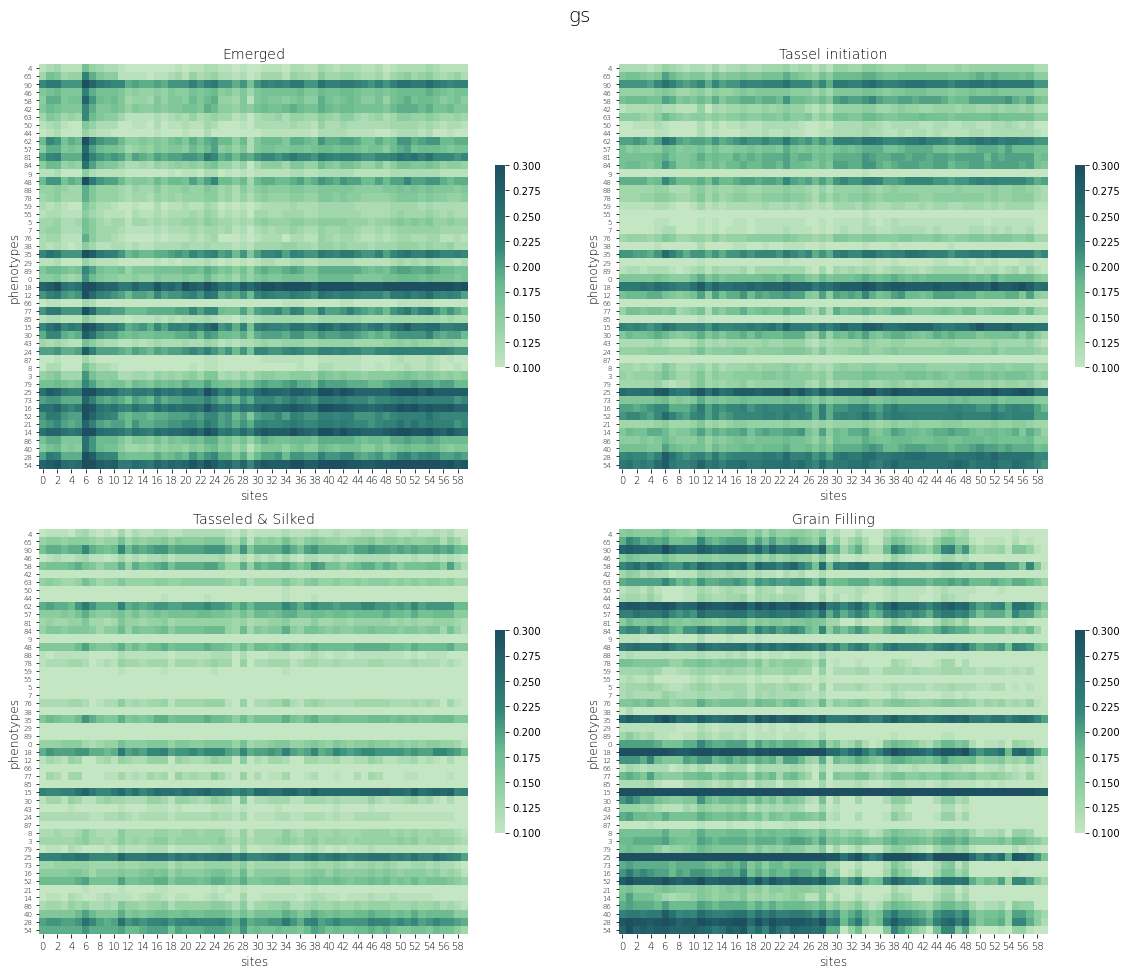

In [106]:
phenos_ranked = rank_top_phenos('present', 20, 1, 1)
plot_sims_heatmap(df_phys, 'gs', 'mean', phenos_ranked, 
                  cmap=BluGrn_6.mpl_colormap, 
                  vmins = [0.1,0.1,0.1,0.1], vmaxs = [0.3,0.3,0.3,0.3],
                  yfont_size=7, fig_w=20, fig_h=16, save=True)

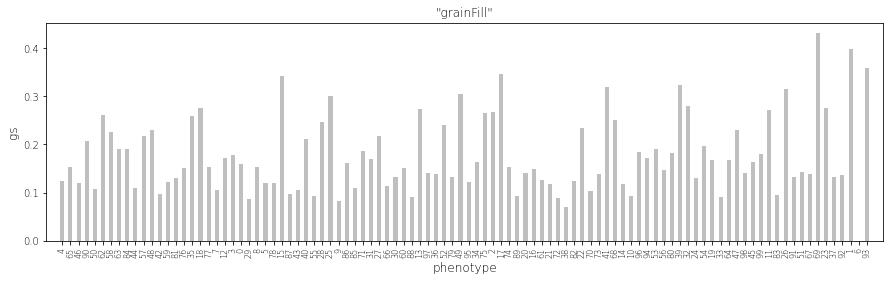

In [147]:
plot_pheno_summary(df_phys, '"grainFill"', 'gs', color='grey', alpha=0.5)

## 3. Water

#### Water deficit - noon averaged within phenostage
- ET_demand - ET_supply (g per plant per hour H2O)
- ET_demand basically is transpiration

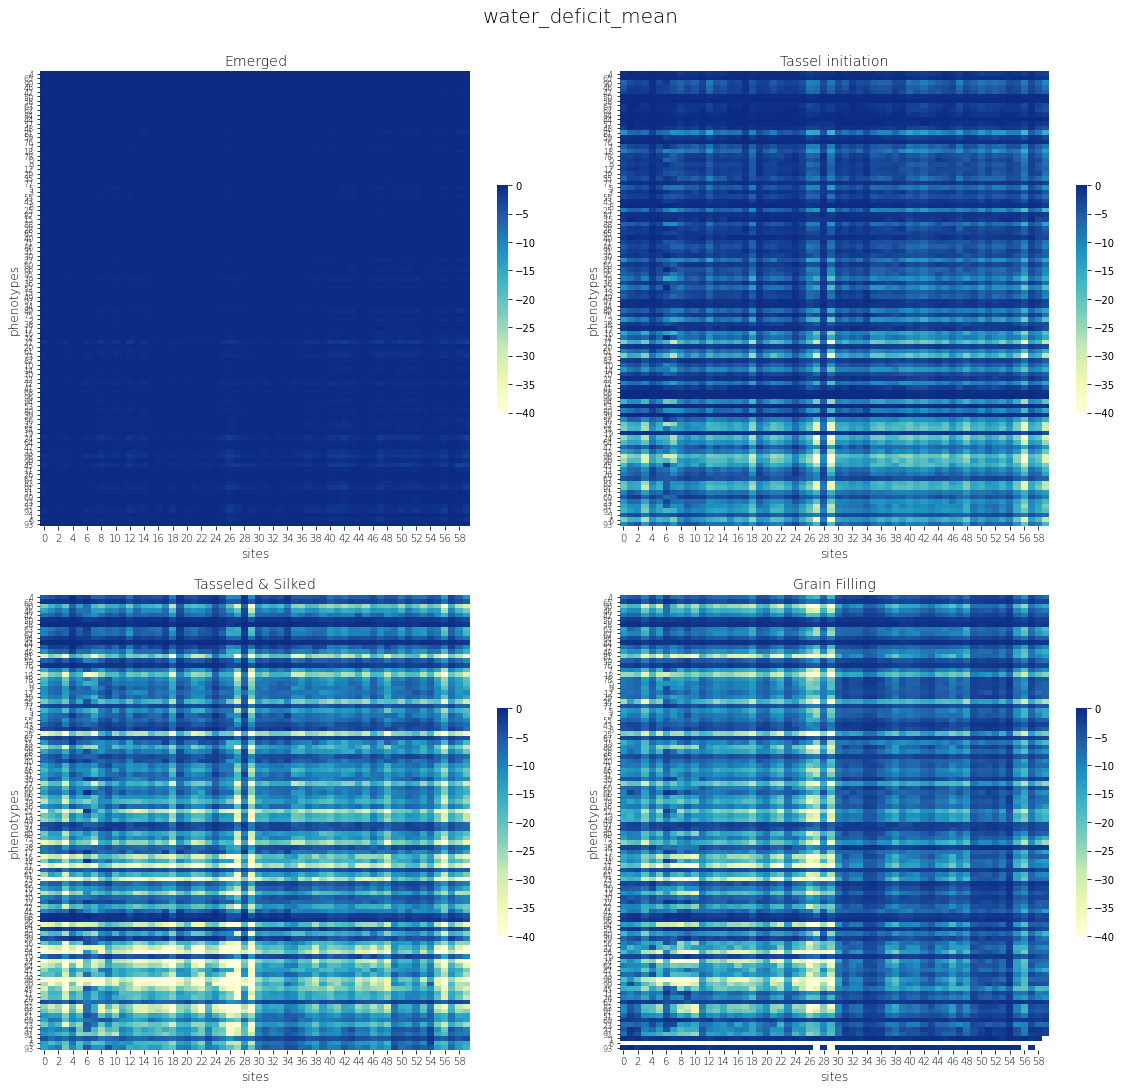

In [6]:
plot_sims_heatmap(df_waterdeficit, 'water_deficit_mean', 'mean', phenos_ranked,
                  YlGnBu_8.mpl_colormap, vmins = [-40,-40,-40,-40], vmaxs = [0,0,0,0],
                  save=True)

#### Water deficit - summed within phenostage

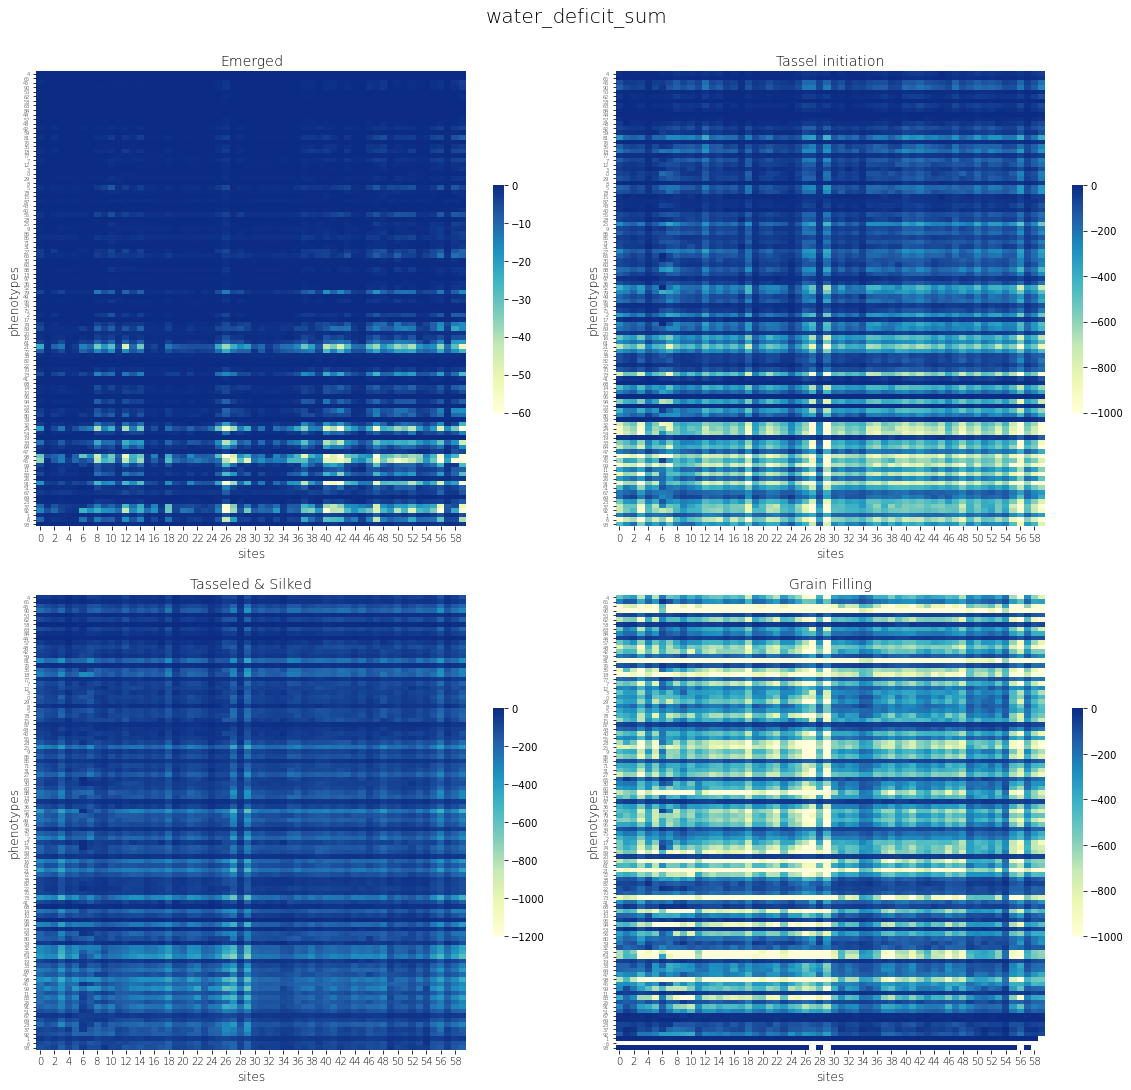

In [30]:
plot_sims_heatmap(df_waterdeficit, 'water_deficit_sum', 'mean', phenos_ranked,
                  YlGnBu_8.mpl_colormap, vmins = [-50,-1000,-1000,-1000], vmaxs = [0,0,0,0])

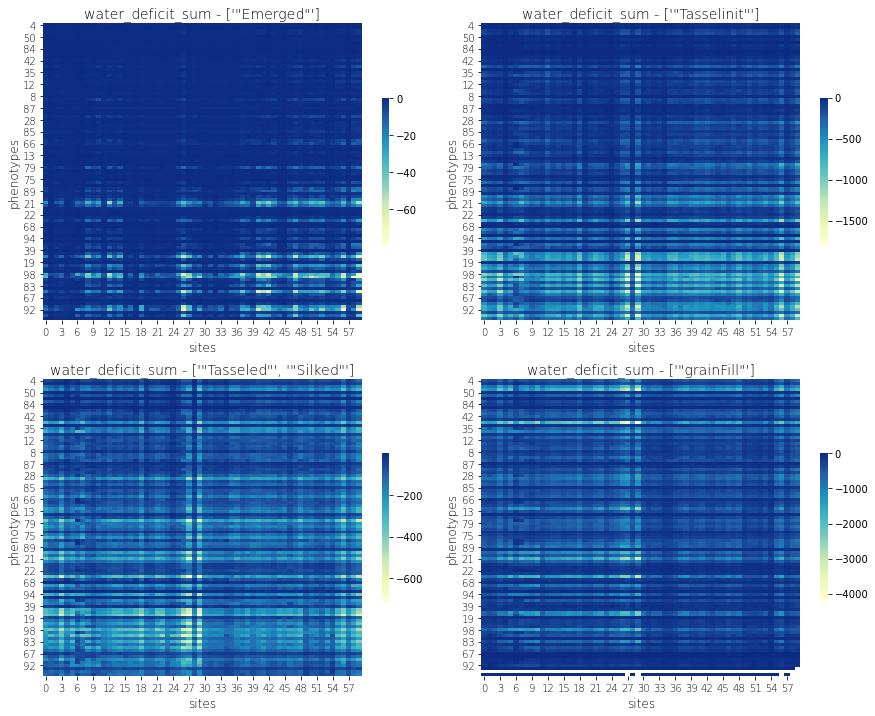

In [185]:
# Parameters
df = df_waterdeficit
sim = 'water_deficit_sum'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = YlGnBu_8.mpl_colormap,
#                     vmin=-40, vmax=0,
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/heatmap_sims_wd.png', format='png', dpi=800)

#### Water deficit per leaf area
Lower performers now end up with lower leaf water deficit per leaf area

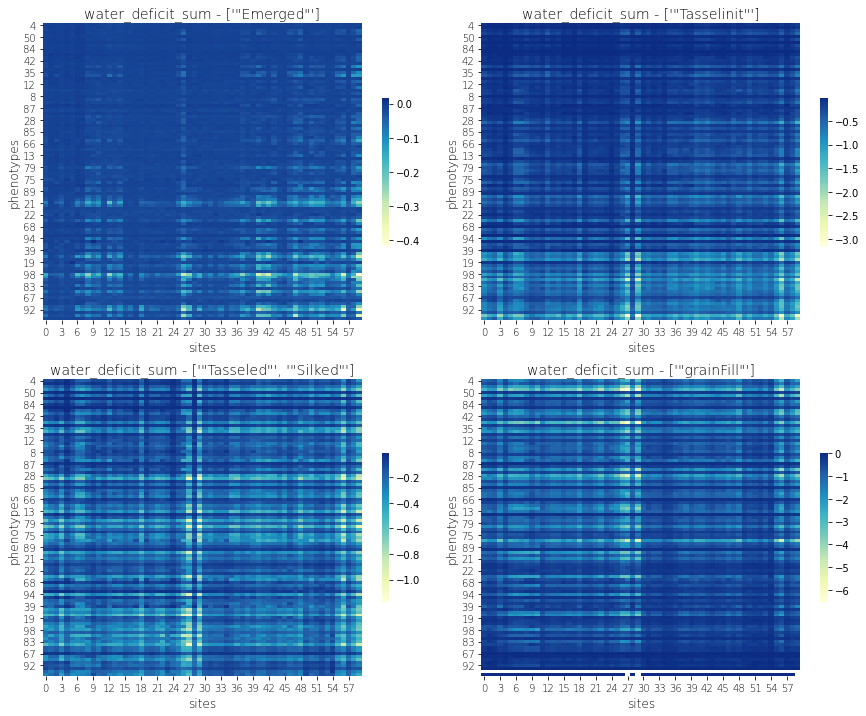

In [211]:
# Parameters
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims_wd = process_sims(df_waterdeficit_sum, sites, phenos, phenostage, 'water_deficit_sum', agg_method='mean')
    mx_sims_leaves = process_sims(df_leaves, sites, phenos, phenostage, 'LA', agg_method='max')
    df_sims_wd = pd.DataFrame(mx_sims_wd).reindex(phenos_ranked)
    df_sims_leaves = pd.DataFrame(mx_sims_leaves).reindex(phenos_ranked)
    df_sims = df_sims_wd / df_sims_leaves

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = YlGnBu_8.mpl_colormap,
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/heatmap_sims_wd_per_la.png', format='png', dpi=800)

#### Leaf water potential

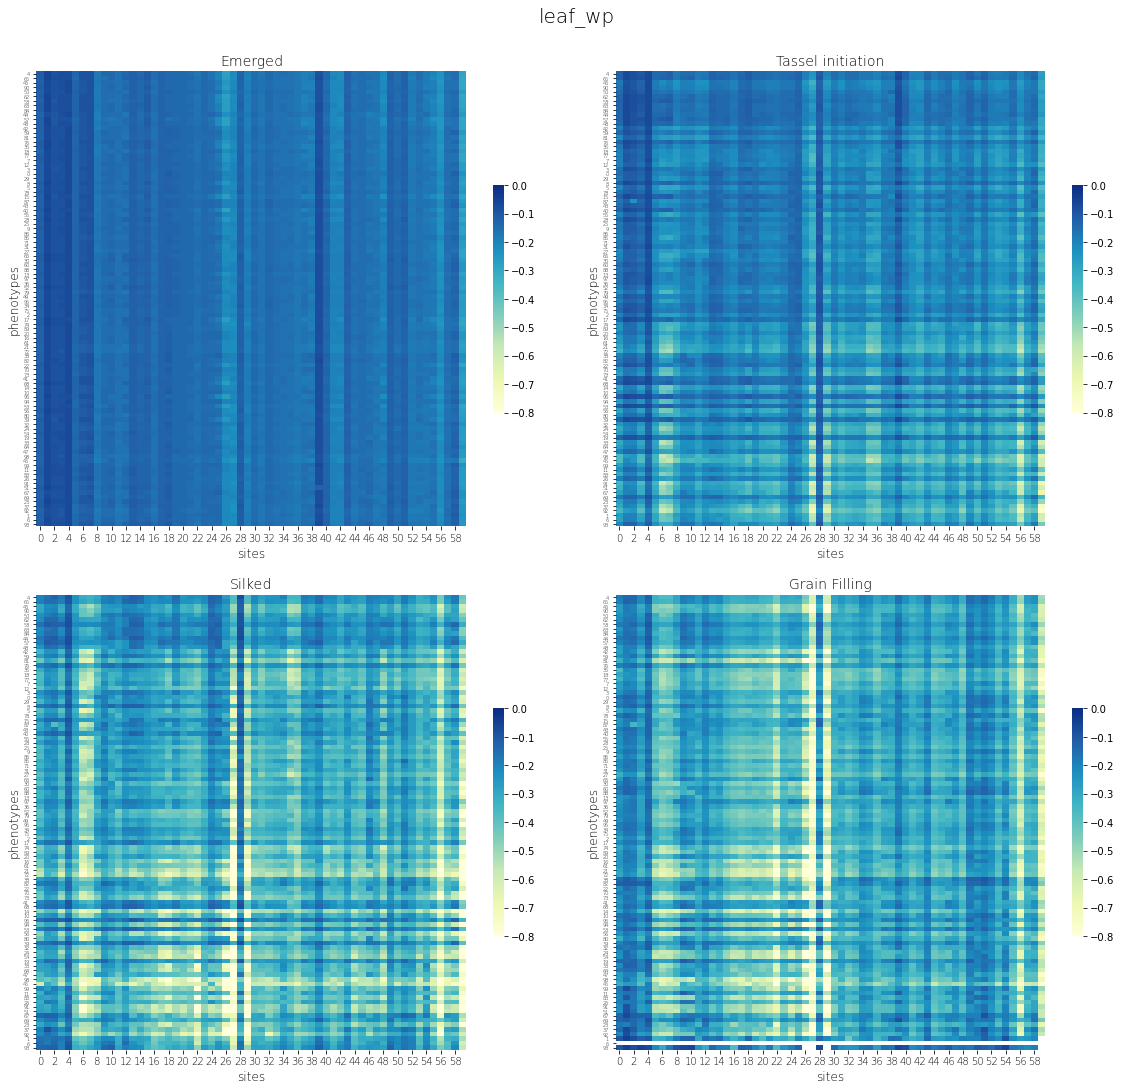

In [33]:
plot_sims_heatmap(df_waterpotential, 'leaf_wp', 'mean', phenos_ranked,
                  YlGnBu_8.mpl_colormap, vmins = [-0.8,-0.8,-0.8,-0.8], vmaxs = [0,0,0,0])

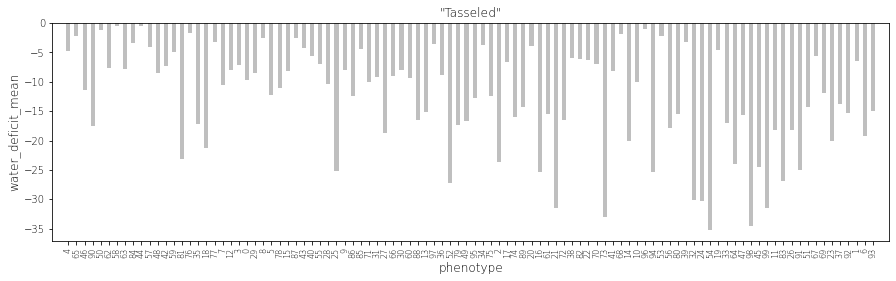

In [38]:
plot_pheno_summary(df_waterdeficit, '"Tasseled"', 'water_deficit_mean', phenos_ranked, color='grey', alpha=0.5)

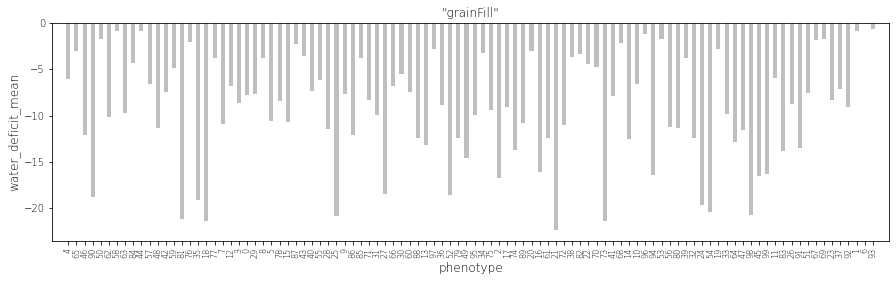

In [37]:
plot_pheno_summary(df_waterdeficit, '"grainFill"', 'water_deficit_mean', phenos_ranked, color='grey', alpha=0.5)

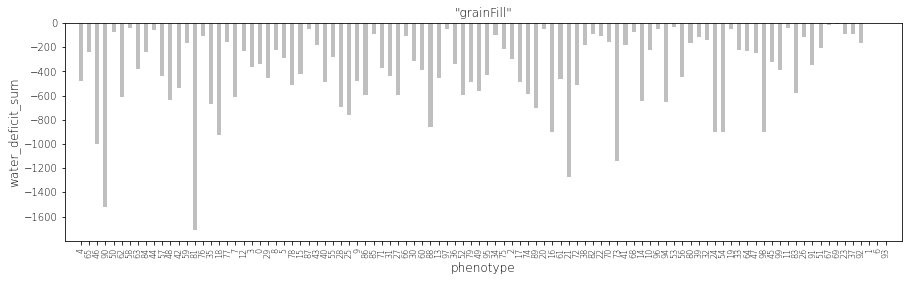

In [36]:
plot_pheno_summary(df_waterdeficit, '"grainFill"', 'water_deficit_sum', phenos_ranked, color='grey', alpha=0.5)

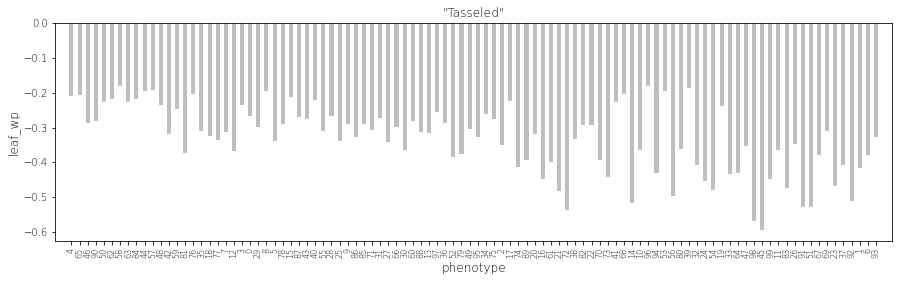

In [39]:
plot_pheno_summary(df_waterpotential, '"Tasseled"', 'leaf_wp', phenos_ranked, color='grey', alpha=0.5)

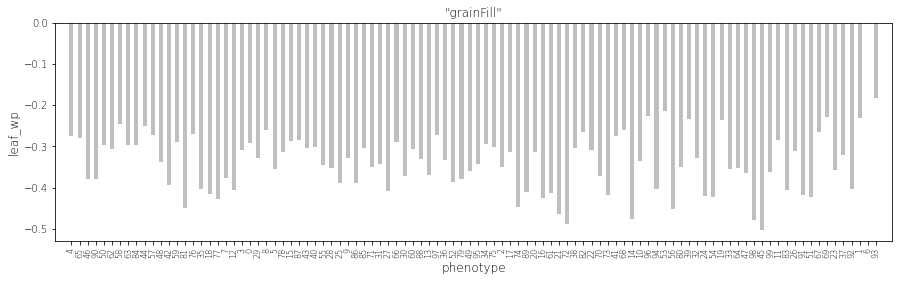

In [35]:
plot_pheno_summary(df_waterpotential, '"grainFill"', 'leaf_wp', phenos_ranked, color='grey', alpha=0.5)

## 4. Morphology

#### Total leaf area

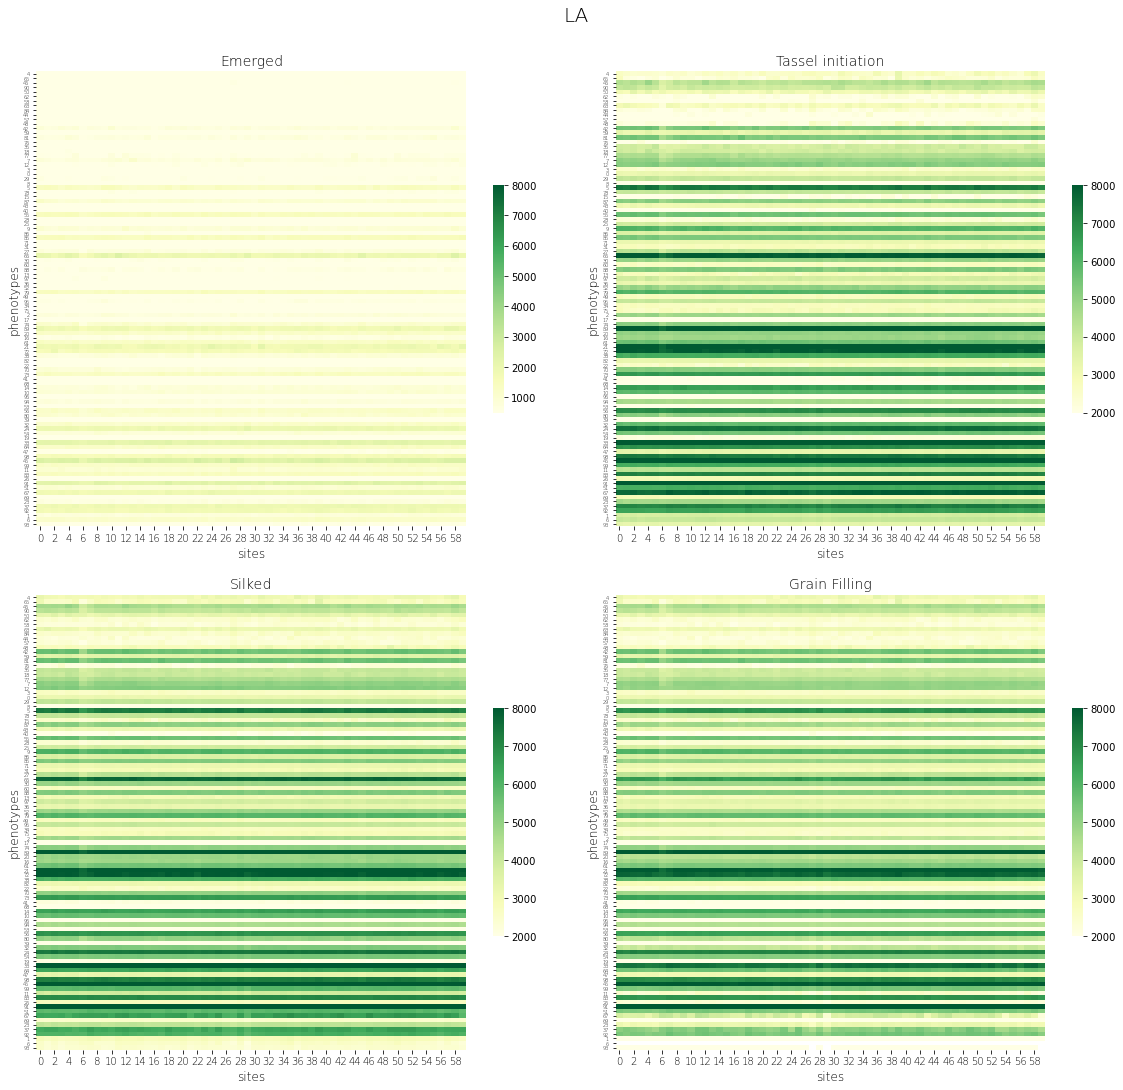

In [47]:
plot_sims_heatmap(df_leaves, 'LA', 'max', phenos_ranked,
                  YlGn_8.mpl_colormap, 
                  vmins = [500,2000,2000,2000],
                  vmaxs = [8000,8000,8000,8000], save=True)

## 5. Phenology

#### Start (jday) of each phenostage

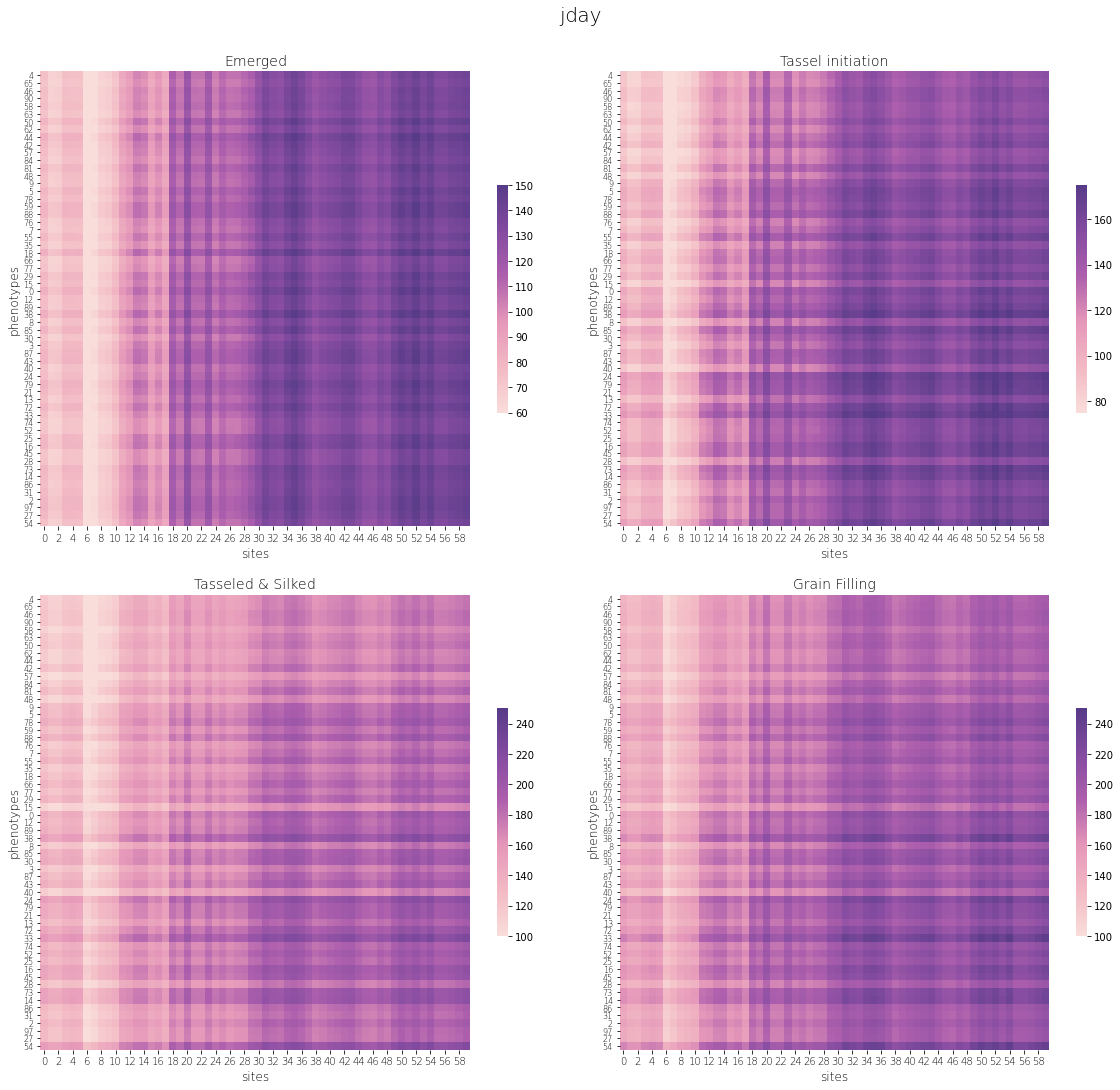

In [9]:
top_phenos = rank_top_phenos('present', 20, 1, 1)
plot_sims_heatmap(df_phenology, 'jday', 'mean', top_phenos,
                  PurpOr_6.mpl_colormap, 
                  vmins = [60,75,100,100],
                  vmaxs = [150,175,250,250])

### Grain-filling start day & grain-filling length

In [5]:
jdays_mean = pd.Series(sim_jdays).mean()
#select_bool = [sim_jday > jdays_mean for sim_jday in sim_jdays]
select_bool = [sim_jday > 200 for sim_jday in sim_jdays]
phenos_latejdays = pd.Series(phenos_ranked)[select_bool]

jdays_mean = pd.Series(sim_jdays).mean()
select_bool = [sim_jday < 180 for sim_jday in sim_jdays]
phenos_earlyjdays = pd.Series(phenos_ranked)[select_bool]

In [14]:
phenodays_mean = pd.Series(sim_phenodays).mean()
select_bool = [sim_phenoday > 70 for sim_phenoday in sim_phenodays]
phenos_longdays = pd.Series(phenos_ranked)[select_bool]

select_bool = [sim_phenoday < 20 for sim_phenoday in sim_phenodays]
phenos_shortdays = pd.Series(phenos_ranked)[select_bool]

In [134]:
test = pd.DataFrame({'jdays': sim_jdays,
                     'rank': np.arange(100),
                     'key': ['1st']*100})

In [235]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ['#573b88','#834ba0','#ad5fad','#ce78b3','#e597b9','#f2b9c4','#f9ddda'])
#matplotlib.cm.register_cmap("carto_purporange_reverse", cmap)
camp_test = sns.color_palette("carto_purporange_reverse", n_colors=100)

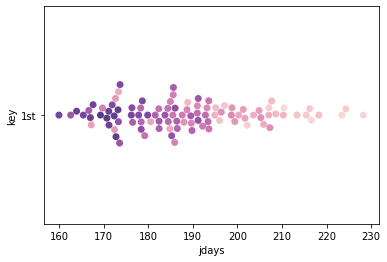

In [237]:
sns.swarmplot(x='jdays',
              y='key',
              hue='rank',
              s=7,
              palette=camp_test,
              data = test)
plt.gca().legend_.remove()
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/swarm_jdays.png', format='png', dpi=800)

Text(0, 0.5, 'grain-filling length (days)')

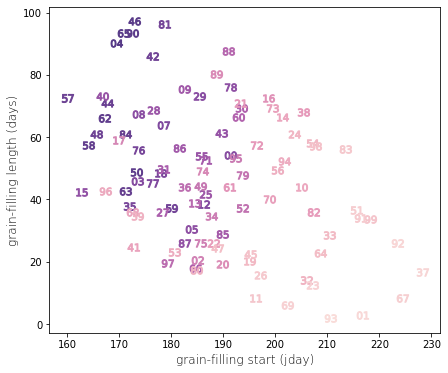

In [4]:
# fetch sim values
phenos_ranked = rank_top_phenos('present', 100, 1, 1)
sim_phenodays = fetch_sim_values(df_phenology, '"grainFill"', 'pheno_days', phenos_ranked)
sim_jdays = fetch_sim_values(df_phenology, '"grainFill"', 'jday', phenos_ranked)

# set up rank & markers
phenos_ranked = rank_top_phenos('present', 100, 1, 1)
markers_pheno = phenos_ranked.copy()
for item, pheno in enumerate(markers_pheno):
    if pheno < 10:
        markers_pheno[item] = str(f'0{pheno}')
markers = [f'${pheno}$' for pheno in markers_pheno]

# visualize
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)

for item in np.arange(100):
    ax.scatter(sim_jdays[item], sim_phenodays[item],
               c=item, cmap=PurpOr_6.mpl_colormap.reversed(), 
               vmin=0, vmax=100, s=150,
               marker=markers[item])

ax.set_xlabel('grain-filling start (jday)', fontweight='light', size=12)
ax.set_ylabel('grain-filling length (days)', fontweight='light', size=12)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_gfstart_gflen.png', format='png', dpi=800)

In [119]:
phenos_improved, phenos_targeted, phenos_new = identify_improved_phenos(20, 1, 1, 'f2100', 20)

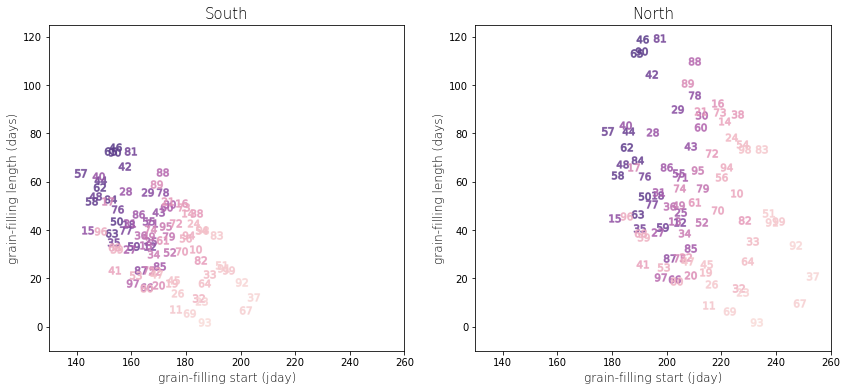

In [21]:
# fetch sim values
phenos_ranked = rank_top_phenos('present', 100, 1, 1)

# set up rank & markers
phenos_ranked = rank_top_phenos('present', 100, 1, 1)
for item, pheno in enumerate(phenos_ranked):
    if pheno < 10:
        phenos_ranked[item] = str(f'0{pheno}')
markers = [f'${pheno}$' for pheno in phenos_ranked]

# visualize
fig = plt.figure(figsize=(14,6))

# north sites
ax1 = fig.add_subplot(1,2,1)
sim_phenodays = fetch_sim_values(df_phenology, '"grainFill"', 'pheno_days', 
                                 phenos_ranked, 'south')
sim_jdays = fetch_sim_values(df_phenology, '"grainFill"', 'jday', 
                             phenos_ranked, 'south')
for item in np.arange(100):
    ax1.scatter(sim_jdays[item], sim_phenodays[item],
                c=item, cmap=PurpOr_6.mpl_colormap.reversed(), 
                vmin=0, vmax=100, s=150, alpha=0.7,
                marker=markers[item])

ax1.set_xlim(130,260)
ax1.set_ylim(-10,125)
ax1.set_xlabel('grain-filling start (jday)', fontweight='light', size=12)
ax1.set_ylabel('grain-filling length (days)', fontweight='light', size=12)
ax1.set_title('South', fontweight='light', size=15)

# south sites
ax2 = fig.add_subplot(1,2,2)
sim_phenodays = fetch_sim_values(df_phenology, '"grainFill"', 'pheno_days', 
                                 phenos_ranked, 'north')
sim_jdays = fetch_sim_values(df_phenology, '"grainFill"', 'jday', 
                             phenos_ranked, 'north')
for item in np.arange(100):
    ax2.scatter(sim_jdays[item], sim_phenodays[item],
                c=item, cmap=PurpOr_6.mpl_colormap.reversed(), 
                vmin=0, vmax=100, s=150, alpha=0.7,
                marker=markers[item])
    
ax2.set_xlim(130,260)
ax2.set_ylim(-10,125)
ax2.set_xlabel('grain-filling start (jday)', fontweight='light', size=12)
ax2.set_ylabel('grain-filling length (days)', fontweight='light', size=12)
ax2.set_title('North', fontweight='light', size=15)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_gfstart_gflen_ns.png', format='png', dpi=800)

#### Growing season length

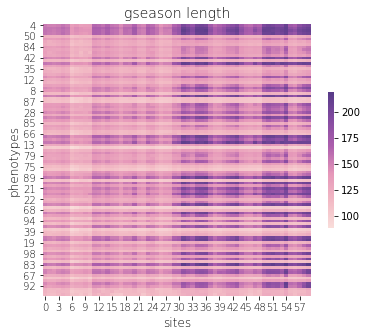

In [221]:
# Parameters
df_phenology_grouped = df_phenology.groupby(['cvar', 'site', 'pheno']).mean()
df_phenology_summed = df_phenology_grouped.groupby(['cvar', 'site']).sum()

# Set up empty matrix to store outputs
mx_phys = np.empty(shape=[len(phenos), len(sites)])
mx_phys[:] = np.nan

# Select outputs
for count_x, pheno in enumerate(phenos):
    for count_y, site in enumerate(sites):
        df_bool = df_phenology_summed.query(
            f'(cvar=={pheno}) & (site=={int(site)})')['pheno_days'].shape[0]
        if df_bool == 0:
            mx_phys[count_x, count_y] = np.nan
        else:
            queried_phys = round(
                df_phenology_summed.query(
                    f'(cvar=={pheno}) '
                    f'& (site=={int(site)})')['pheno_days'].item(), 2)
            mx_phys[count_x, count_y] = queried_phys


df_sims = pd.DataFrame(mx_phys).reindex(phenos_ranked)

# Visualization
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)
im = sns.heatmap(df_sims, cmap = PurpOr_6.mpl_colormap,
                 cbar_kws={'shrink': 0.5})
ax.set_title('gseason length', fontweight='light', size=14)
ax.set_xlabel('sites', fontweight='light', size=12)
ax.set_ylabel('phenotypes', fontweight='light', size=12)
plt.xticks(fontweight='light', fontsize=10)
plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0.25)
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/heatmap_sims_gseason_len.png', format='png', dpi=800)

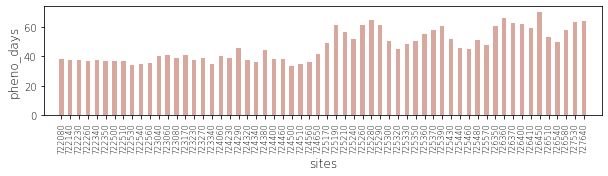

In [22]:
plot_site_summary(df_phenology, '"grainFill"', 'pheno_days', color=Mendl_4.mpl_colors[2], alpha=0.8)

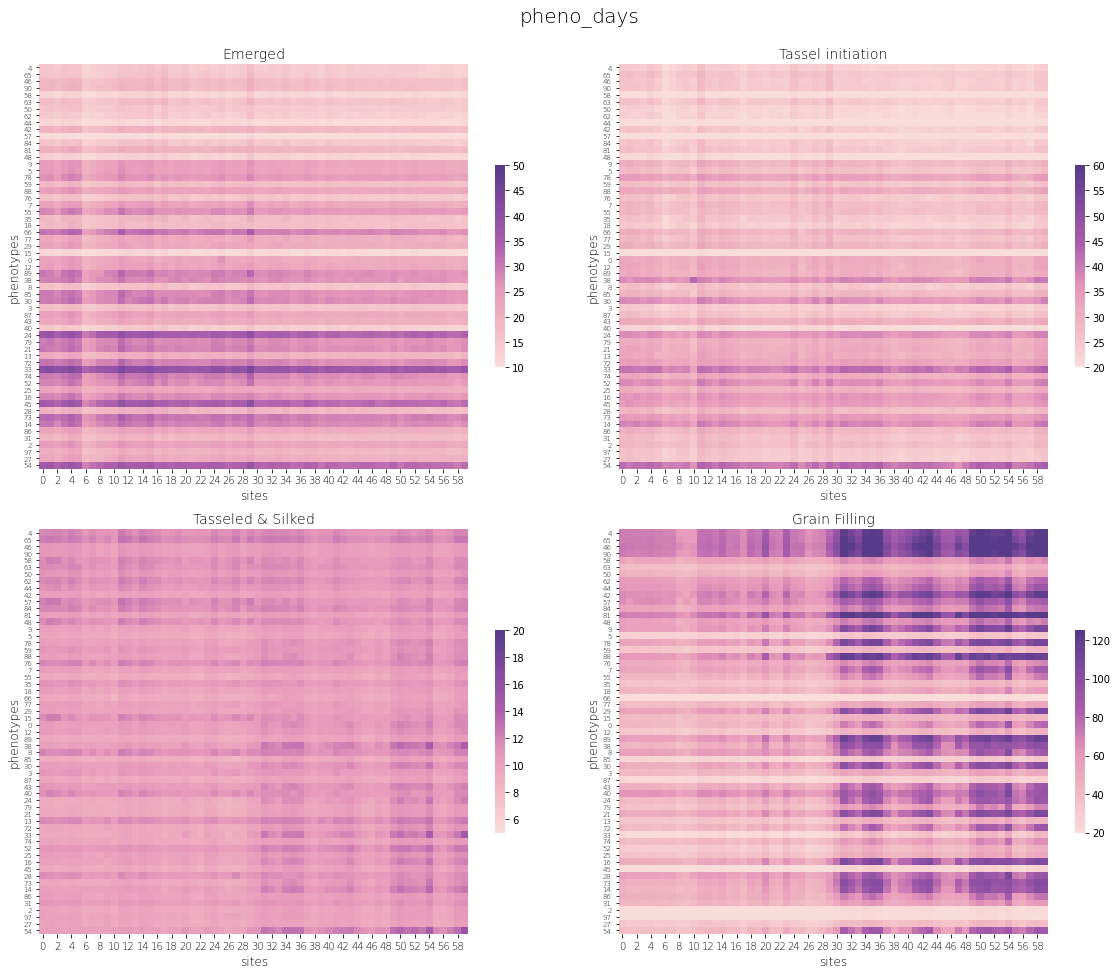

In [10]:
phenos_ranked = rank_top_phenos('present', 20, 1, 1)
plot_sims_heatmap(df_phenology, 'pheno_days', 'mean', phenos_ranked, 
                  cmap=PurpOr_6.mpl_colormap, 
                  vmins = [10,20,5,20], vmaxs = [50,60,20,125],
                  yfont_size=7, fig_w=20, fig_h=16, save=True)

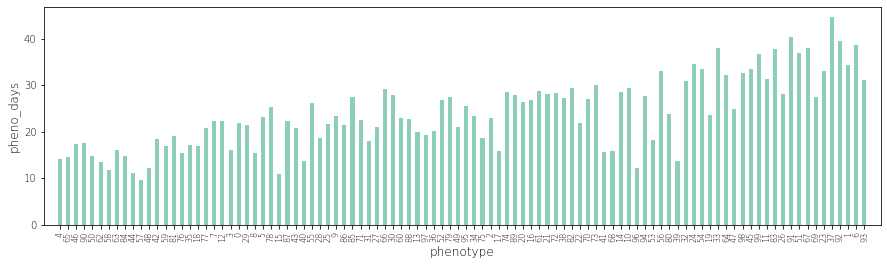

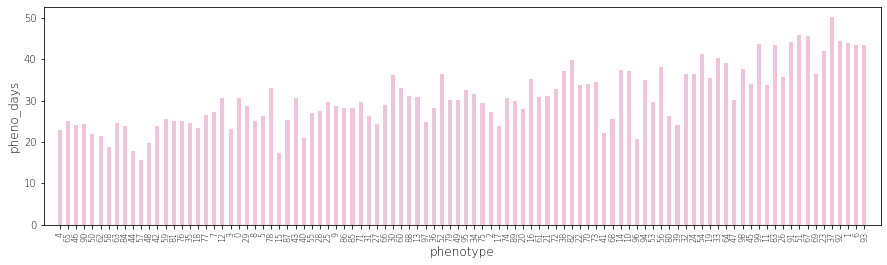

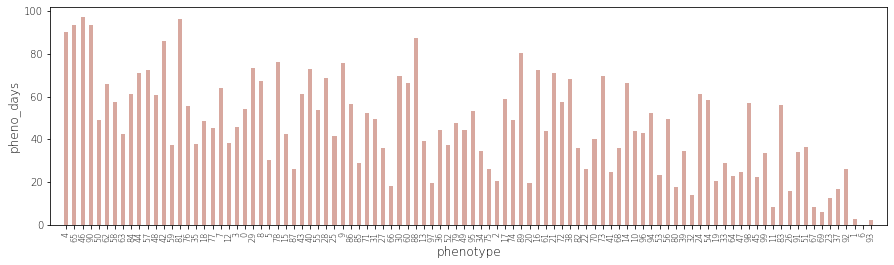

In [88]:
plot_pheno_summary(df_phenology, '"Emerged"', 'pheno_days', color='#1b9e77', alpha=0.5)
plot_pheno_summary(df_phenology, '"Tasselinit"', 'pheno_days', color=Mendl_4.mpl_colors[0], alpha=0.5)
plot_pheno_summary(df_phenology, '"grainFill"', 'pheno_days', color=Mendl_4.mpl_colors[2], alpha=0.8)

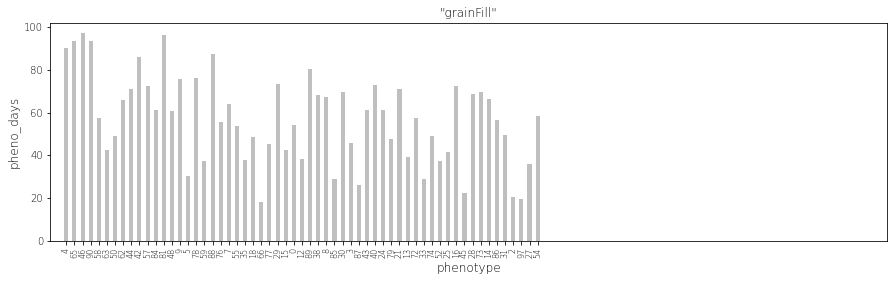

In [5]:
phenos_ranked = rank_top_phenos('present', 20, 1, 1)
plot_pheno_summary(df_phenology, '"grainFill"', 'pheno_days', phenos_ranked,
                   color='grey', alpha=0.5, save=True)

### Detailed phenostage development plots

In [5]:
from palettable.cartocolors.diverging import Geyser_7

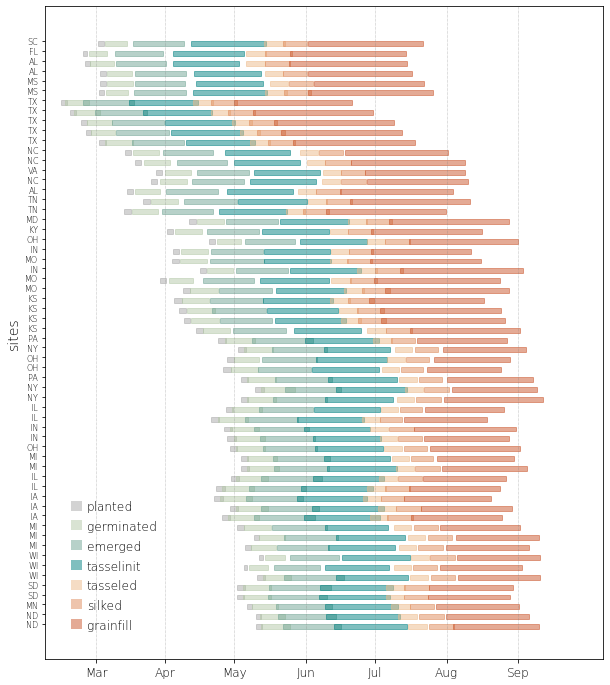

In [6]:
df_phenology_grouped = df_phenology.groupby(['site', 'pheno']).mean()

phenostages = [['"none"', '"Germinated"'],
               ['"Germinated"', '"Emerged"'],
               ['"Emerged"', '"Tasselinit"'],
               ['"Tasselinit"', '"Tasseled"'],
               ['"Tasseled"', '"Silked"'],
               ['"Silked"', '"grainFill"'],
               ['"grainFill"', '"Matured"']]
        
colors = ['darkgrey', 
          Geyser_7.mpl_colors[2],
          Geyser_7.mpl_colors[1],
          Geyser_7.mpl_colors[0],          
          Geyser_7.mpl_colors[-3],
          Geyser_7.mpl_colors[-2],
          Geyser_7.mpl_colors[-1]]

# visualization
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(1,1,1)
ax.plot([50,270],[0,60], alpha=0)
ax.set_ylabel('sites', fontweight='light', fontsize=14)
ax.set_yticks(np.arange(0.5,60.5))
ax.set_yticklabels(df_sites.state[::-1], fontweight='light', fontsize=8)

jday_months = [61, 91, 121, 152, 182, 213, 244]
ax.set_xticks(jday_months)
ax.set_xticklabels(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'],
                   fontweight='light', fontsize=12)

# vertical month lines
for jday_month in jday_months:
    ax.axvline(x=jday_month, color='grey', linewidth=0.5, linestyle=':')
    
# phenostage legends
legend_planted = plt.Rectangle(
    (50, 12), 5, 1, fc='darkgrey', alpha=0.5)
legend_germinated = plt.Rectangle(
    (50, 10), 5, 1, fc=Geyser_7.mpl_colors[2], alpha=0.5)
legend_emerged = plt.Rectangle(
    (50, 8), 5, 1, fc=Geyser_7.mpl_colors[1], alpha=0.5)
legend_tasselinit = plt.Rectangle(
    (50, 6), 5, 1, fc=Geyser_7.mpl_colors[0], alpha=0.5)
legend_tasseled = plt.Rectangle(
    (50, 4), 5, 1, fc=Geyser_7.mpl_colors[-3], alpha=0.5)
legend_silked = plt.Rectangle(
    (50, 2), 5, 1, fc=Geyser_7.mpl_colors[-2], alpha=0.5)
legend_grainfill = plt.Rectangle(
    (50, 0), 5, 1, fc=Geyser_7.mpl_colors[-1], alpha=0.5)
plt.gca().add_patch(legend_planted)
plt.gca().add_patch(legend_germinated)
plt.gca().add_patch(legend_emerged)
plt.gca().add_patch(legend_tasselinit)
plt.gca().add_patch(legend_tasseled)
plt.gca().add_patch(legend_silked)
plt.gca().add_patch(legend_grainfill)
ax.text(57, 12, 'planted', fontweight='light', size=12)
ax.text(57, 10, 'germinated', fontweight='light', size=12)
ax.text(57, 8, 'emerged', fontweight='light', size=12)
ax.text(57, 6, 'tasselinit', fontweight='light', size=12)
ax.text(57, 4, 'tasseled', fontweight='light', size=12)
ax.text(57, 2, 'silked', fontweight='light', size=12)
ax.text(57, 0, 'grainfill', fontweight='light', size=12)

# phenostage patches
for phenostage, color in zip(phenostages, colors):
    df_phenostage1 = df_phenology_grouped[df_phenology_grouped.index.get_level_values('pheno') == f'{phenostage[0]}']
    df_phenostage2 = df_phenology_grouped[df_phenology_grouped.index.get_level_values('pheno') == f'{phenostage[1]}']

    sites1 = list(df_phenostage1.index.get_level_values('site'))
    sites2 = list(df_phenostage2.index.get_level_values('site'))

    jdays_start = pd.DataFrame(np.empty(60), index=sites1, columns=['jday'])
    jdays_start[:] = np.nan
    jdays_start.loc[sites1, 'jday'] = list(df_phenostage1.jday.values)    
    
    jdays_end = pd.DataFrame(np.empty(60), index=sites1, columns=['jday'])
    jdays_end[:] = np.nan
    jdays_end.loc[sites2, 'jday'] = list(df_phenostage2.jday.values)

    jdays_len = [jdays_end.loc[site, 'jday'] - jdays_start.loc[site, 'jday'] for site in sites1]
    rankings = list(np.arange(60))
    rankings.reverse()
    
    for item, site in zip(rankings, sites1):
        rect = patches.Rectangle((jdays_start.loc[site, 'jday'], item), 
                                 jdays_len[item], 0.5,
                                 color=color,
                                 alpha=0.5)
        ax.add_patch(rect)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/bars_phenostage_sites.png', format='png', dpi=800)

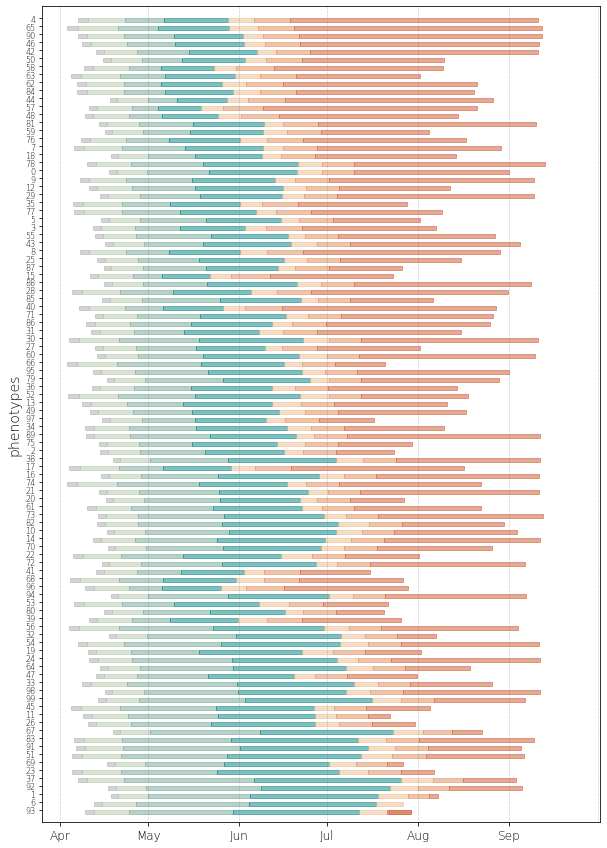

In [44]:
phenos_ranked = rank_top_phenos('present', 100, 1, 1)
df_phenology_grouped = df_phenology.groupby(['cvar', 'pheno']).mean()

phenostages = [['"none"', '"Germinated"'],
               ['"Germinated"', '"Emerged"'],
               ['"Emerged"', '"Tasselinit"'],
               ['"Tasselinit"', '"Tasseled"'],
               ['"Tasseled"', '"Silked"'],
               ['"Silked"', '"grainFill"'],
               ['"grainFill"', '"Matured"']]
        
colors = ['darkgrey', 
          Geyser_7.mpl_colors[2],
          Geyser_7.mpl_colors[1],
          Geyser_7.mpl_colors[0],          
          Geyser_7.mpl_colors[-3],
          Geyser_7.mpl_colors[-2],
          Geyser_7.mpl_colors[-1]]

# visualization
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(1,1,1)
ax.plot([85,270],[0,100], alpha=0)
ax.set_ylabel('phenotypes', fontweight='light', fontsize=14)
ax.set_xticks([91, 121, 152, 182, 213, 244])
ax.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'], 
                   fontweight='light', fontsize=12)
ax.set_xlim(85,275)
ax.set_ylim(-1,101)
ax.set_yticks(np.arange(0.5,100.5))
ax.set_yticklabels(phenos_ranked[::-1], fontweight='light', fontsize=8)

jday_months = [91, 121, 152, 182, 213, 244, 274, 305, 335, 350]
for jday_month in jday_months:
    ax.axvline(x=jday_month, color='grey', linewidth=0.5, linestyle=':')

for phenostage, color in zip(phenostages, colors):
    df_phenostage1 = df_phenology_grouped[df_phenology_grouped.index.get_level_values('pheno') == f'{phenostage[0]}']
    df_phenostage2 = df_phenology_grouped[df_phenology_grouped.index.get_level_values('pheno') == f'{phenostage[1]}']

    cvars1 = list(df_phenostage1.index.get_level_values('cvar'))
    cvars2 = list(df_phenostage2.index.get_level_values('cvar'))

    jdays_start = np.empty(100)
    jdays_start[:] = np.nan
    jdays_start[cvars1] = list(df_phenostage1.jday.values)

    jdays_end = np.empty(100)
    jdays_end[:] = np.nan
    jdays_end[cvars2] = list(df_phenostage2.jday.values)

    jdays_len = [jend - jstart for jend, jstart in zip(jdays_end, jdays_start)]
    rankings = list(np.arange(100))
    rankings.reverse()
    
    for item, pheno in zip(rankings, phenos_ranked):
        rect = patches.Rectangle((jdays_start[pheno], item), 
                                 jdays_len[pheno], 0.5,
                                 color=color,
                                 alpha=0.5)
        ax.add_patch(rect)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/bars_phenostage_phenos.png', format='png', dpi=800)

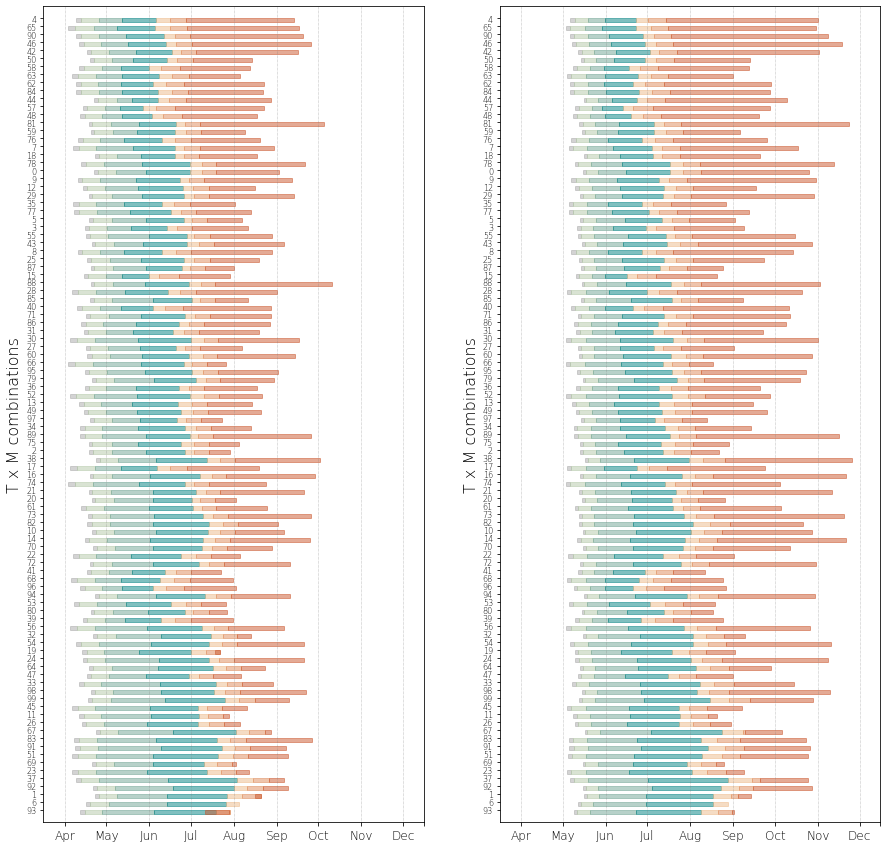

In [103]:
# Split sites into North vs. South
sites = df_sites.site
sites_south = sites[:30]
sites_north = sites[30:]

# Process phenostage dataframe
df_phenology_grouped = df_phenology.groupby(['cvar', 'site', 'pheno']).mean()
df_pheno_south = df_phenology_grouped.query(f'site <= {int(list(sites_south)[-1])}')
df_pheno_north = df_phenology_grouped.query(f'site > {int(list(sites_south)[-1])}')

phenostages = [['"none"', '"Germinated"'],
               ['"Germinated"', '"Emerged"'],
               ['"Emerged"', '"Tasselinit"'],
               ['"Tasselinit"', '"Tasseled"'],
               ['"Tasseled"', '"Silked"'],
               ['"Silked"', '"grainFill"'],
               ['"grainFill"', '"Matured"']]

titles = ['South', 'North']
colors = ['darkgrey', 
          Geyser_7.mpl_colors[2],
          Geyser_7.mpl_colors[1],
          Geyser_7.mpl_colors[0],          
          Geyser_7.mpl_colors[-3],
          Geyser_7.mpl_colors[-2],
          Geyser_7.mpl_colors[-1]]

fig = plt.figure(figsize=(15,15))

for item, df_loc in enumerate([df_pheno_south, df_pheno_north]):
    ax = fig.add_subplot(1,2,item+1)
    ax.plot([85,270],[0,100], alpha=0)
    ax.set_ylabel('T x M combinations', fontweight='light', fontsize=16)
    jday_months = [91, 121, 152, 182, 213, 244, 274, 305, 335, 350]
    ax.set_xticks(jday_months)
    ax.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', ''], 
                       fontweight='light', fontsize=12)
    ax.set_ylim(-1,101)
    ax.set_yticks(np.arange(0.5,100.5))
    ax.set_yticklabels(phenos_ranked[::-1], fontweight='light', fontsize=8)
    
    for jday_month in jday_months:
        ax.axvline(x=jday_month, color='grey', linewidth=0.5, linestyle=':')
    
    for phenostage, color in zip(phenostages, colors):
        df_phenostage1 = df_loc[df_loc.index.get_level_values('pheno') == f'{phenostage[0]}']
        df_phenostage2 = df_loc[df_loc.index.get_level_values('pheno') == f'{phenostage[1]}']

        cvars1 = list(df_phenostage1.index.get_level_values('cvar'))
        cvars2 = list(df_phenostage2.index.get_level_values('cvar'))

        jdays_start = np.empty(100)
        jdays_start[:] = np.nan
        jdays_start[cvars1] = list(df_phenostage1.jday.values)

        jdays_end = np.empty(100)
        jdays_end[:] = np.nan
        jdays_end[cvars2] = list(df_phenostage2.jday.values)

        jdays_len = [jend - jstart for jend, jstart in zip(jdays_end, jdays_start)]
        rankings = list(np.arange(100))
        rankings.reverse()

        for item, pheno in zip(rankings, phenos_ranked):
            rect = patches.Rectangle((jdays_start[pheno], item), 
                                     jdays_len[pheno], 0.5,
                                     color=color,
                                     alpha=0.5)
            ax.add_patch(rect)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/bars_phenostage_phenos_ns.png', format='png', dpi=800)

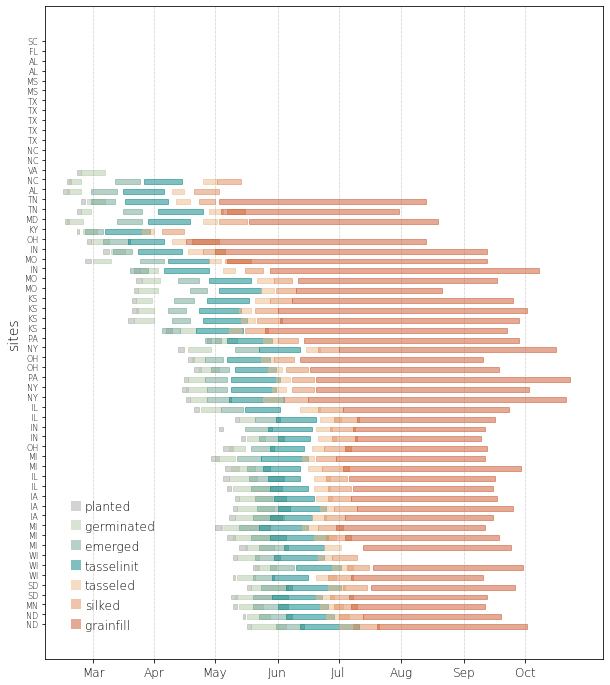

In [99]:
df_phenology_grouped = df_phenology.query(
    'cvar==4').query('year==1975').groupby(['site', 'pheno']).mean()

phenostages = [['"none"', '"Germinated"'],
               ['"Germinated"', '"Emerged"'],
               ['"Emerged"', '"Tasselinit"'],
               ['"Tasselinit"', '"Tasseled"'],
               ['"Tasseled"', '"Silked"'],
               ['"Silked"', '"grainFill"'],
               ['"grainFill"', '"Matured"']]
        
colors = ['darkgrey', 
          Geyser_7.mpl_colors[2],
          Geyser_7.mpl_colors[1],
          Geyser_7.mpl_colors[0],          
          Geyser_7.mpl_colors[-3],
          Geyser_7.mpl_colors[-2],
          Geyser_7.mpl_colors[-1]]

# visualization
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(1,1,1)
ax.plot([50,300],[0,60], alpha=0)
ax.set_ylabel('sites', fontweight='light', fontsize=14)
ax.set_yticks(np.arange(0.5,60.5))
ax.set_yticklabels(df_sites.state[::-1], fontweight='light', fontsize=8)

jday_months = [61, 91, 121, 152, 182, 213, 244, 274]
ax.set_xticks(jday_months)
ax.set_xticklabels(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
                   fontweight='light', fontsize=12)

# vertical month lines
for jday_month in jday_months:
    ax.axvline(x=jday_month, color='grey', linewidth=0.5, linestyle=':')
    
# phenostage legends
legend_planted = plt.Rectangle(
    (50, 12), 5, 1, fc='darkgrey', alpha=0.5)
legend_germinated = plt.Rectangle(
    (50, 10), 5, 1, fc=Geyser_7.mpl_colors[2], alpha=0.5)
legend_emerged = plt.Rectangle(
    (50, 8), 5, 1, fc=Geyser_7.mpl_colors[1], alpha=0.5)
legend_tasselinit = plt.Rectangle(
    (50, 6), 5, 1, fc=Geyser_7.mpl_colors[0], alpha=0.5)
legend_tasseled = plt.Rectangle(
    (50, 4), 5, 1, fc=Geyser_7.mpl_colors[-3], alpha=0.5)
legend_silked = plt.Rectangle(
    (50, 2), 5, 1, fc=Geyser_7.mpl_colors[-2], alpha=0.5)
legend_grainfill = plt.Rectangle(
    (50, 0), 5, 1, fc=Geyser_7.mpl_colors[-1], alpha=0.5)
plt.gca().add_patch(legend_planted)
plt.gca().add_patch(legend_germinated)
plt.gca().add_patch(legend_emerged)
plt.gca().add_patch(legend_tasselinit)
plt.gca().add_patch(legend_tasseled)
plt.gca().add_patch(legend_silked)
plt.gca().add_patch(legend_grainfill)
ax.text(57, 12, 'planted', fontweight='light', size=12)
ax.text(57, 10, 'germinated', fontweight='light', size=12)
ax.text(57, 8, 'emerged', fontweight='light', size=12)
ax.text(57, 6, 'tasselinit', fontweight='light', size=12)
ax.text(57, 4, 'tasseled', fontweight='light', size=12)
ax.text(57, 2, 'silked', fontweight='light', size=12)
ax.text(57, 0, 'grainfill', fontweight='light', size=12)

# phenostage patches
for phenostage, color in zip(phenostages, colors):
    df_phenostage1 = df_phenology_grouped[df_phenology_grouped.index.get_level_values('pheno') == f'{phenostage[0]}']
    df_phenostage2 = df_phenology_grouped[df_phenology_grouped.index.get_level_values('pheno') == f'{phenostage[1]}']

    sites1 = list(df_phenostage1.index.get_level_values('site'))
    sites2 = list(df_phenostage2.index.get_level_values('site'))

    jdays_start = pd.DataFrame(np.empty(len(sites1)), index=sites1, columns=['jday'])
    jdays_start[:] = np.nan
    jdays_start.loc[sites1, 'jday'] = list(df_phenostage1.jday.values)    
    
    jdays_end = pd.DataFrame(np.empty(len(sites1)), index=sites1, columns=['jday'])
    jdays_end[:] = np.nan
    jdays_end.loc[sites2, 'jday'] = list(df_phenostage2.jday.values)

    jdays_len = [jdays_end.loc[site, 'jday'] - jdays_start.loc[site, 'jday'] for site in sites1]
    rankings = list(np.arange(len(sites1)))
    rankings.reverse()
    
    for item, site in zip(rankings, sites1):
        rect = patches.Rectangle((jdays_start.loc[site, 'jday'], item), 
                                 jdays_len[item], 0.5,
                                 color=color,
                                 alpha=0.5)
        ax.add_patch(rect)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/bars_phenostage_sites.png', format='png', dpi=800)

### Identify phenotypes with targeted parameters

0.7307692307692307


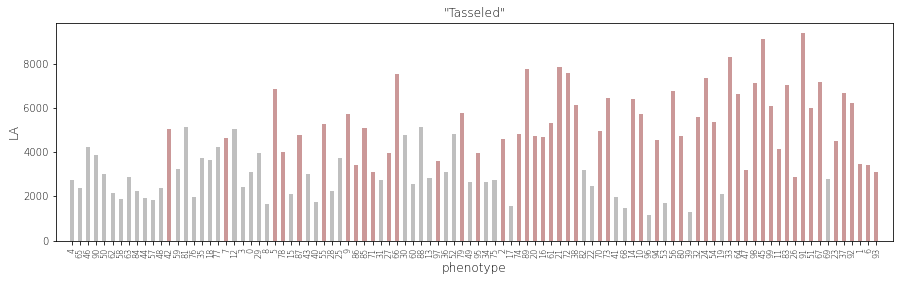

In [20]:
# Identify phenotypes with hihger-than-average leaf numbers
target_phenos, perct = calc_target_pheno_perct(df_params, phenos_ranked, 'juv_leaves', 'greater')
print(perct)

# Visualize phenotypes
plot_pheno_summary(df_leaves, '"Tasseled"', 'LA', color='grey', alpha=0.5,
                   target_phenos=target_phenos, target_color='red', target_alpha=0.2)

0.4


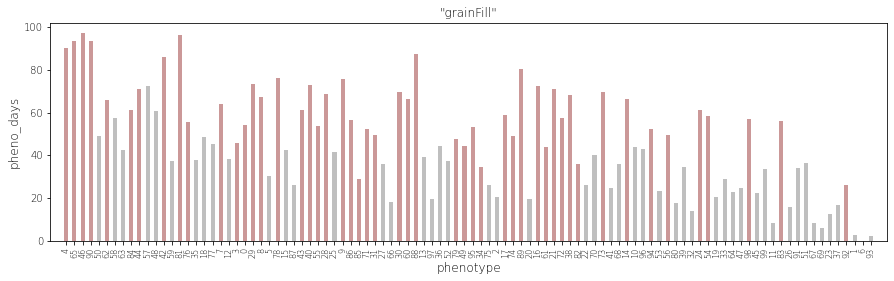

In [21]:
# Identify phenotypes with hihger-than-average staygreen

target_phenos, perct = calc_target_pheno_perct(df_params, phenos_ranked, 'staygreen', 'greater')
print(perct)

# Visualize phenotypes
plot_pheno_summary(df_phenology, '"grainFill"', 'pheno_days', color='grey', alpha=0.5,
                   target_phenos=target_phenos, target_color='red', target_alpha=0.2)

#### Grainfill stage compared to total gseason length

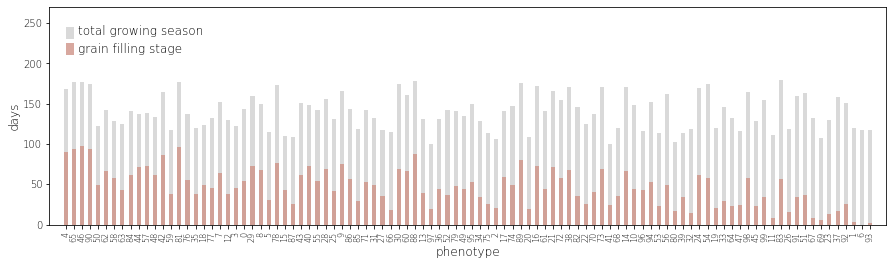

In [18]:
# Group output by phenotypes and pheno stages
df_pheno_grouped = df_phenology.groupby(['cvar', 'pheno']).mean().reset_index()
pheno_season_len = df_pheno_grouped.groupby('cvar').sum().pheno_days
pheno_season_len_sorted = [pheno_season_len[pheno] for pheno in phenos_ranked]

# Fetch pheno stage length of specified stage
pheno_stage = '"grainFill"'
pheno_days = []
for pheno in phenos_ranked:
    df_bool = df_pheno_grouped[
        (df_pheno_grouped.pheno == pheno_stage) & 
        (df_pheno_grouped.cvar == pheno)].pheno_days.shape[0]
    if df_bool == 0:
        pheno_days.append(np.nan)
    else:
        pheno_day = df_pheno_grouped[
            (df_pheno_grouped.pheno == pheno_stage) & 
            (df_pheno_grouped.cvar == pheno)].pheno_days.values.item()
        pheno_days.append(pheno_day)

# Turn top pheno list into string for plotting purposes
phenos_str = [str(pheno) for pheno in phenos_ranked]

# Visualization
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)

ax.bar(phenos_str, pheno_season_len_sorted, width=0.5, color='#d9d9d9')
ax.bar(phenos_str, pheno_days, width=0.5, color=Mendl_4.mpl_colors[2], alpha=0.8)

ax.set_ylabel('days', fontweight='light', size=12)
ax.set_xlabel('phenotype', fontweight='light', size=12)
plt.xticks(fontweight='light', fontsize=8, rotation=90)
plt.yticks(fontweight='light', fontsize=10, rotation=0)

ax.set_xlim(-2,101)
ax.set_ylim(0, 270)
season_len_legend = plt.Rectangle((0, 230), 1, 15, fc='#d9d9d9')
grainfill_legend = plt.Rectangle((0, 210), 1, 15, fc=Mendl_4.mpl_colors[2], alpha=0.8)
plt.gca().add_patch(season_len_legend)
plt.gca().add_patch(grainfill_legend)
ax.text(1.5, 235, 'total growing season', fontweight='light', size=12)
ax.text(1.5, 213, 'grain filling stage', fontweight='light', size=12)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/bars_sims_grainfill.png', format='png', dpi=800)